In [1]:
import pandas as pd
import numpy as np
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
pd.set_option('display.max_row', 100)
pd.set_option('display.max_column', 100)

In [356]:
pd.set_option('display.max_row', 200)
pd.set_option('display.max_column', 200)

In [ ]:
# color_discrete_sequence=px.colors.qualitative.Dark24
# color_continuous_scale=px.colors.sequential.Viridis
# px.colors.qualitative.swatches()
# px.colors.sequential.swatches()

# Import week 4 covid data

In [5]:
covid = pd.read_csv('covid19-global-forecasting-week-4/train.csv')
covid

Id Province_State Country_Region        Date  ConfirmedCases  \
0          1            NaN    Afghanistan  2020-01-22             0.0   
1          2            NaN    Afghanistan  2020-01-23             0.0   
2          3            NaN    Afghanistan  2020-01-24             0.0   
3          4            NaN    Afghanistan  2020-01-25             0.0   
4          5            NaN    Afghanistan  2020-01-26             0.0   
...      ...            ...            ...         ...             ...   
35990  35991            NaN       Zimbabwe  2020-05-11            36.0   
35991  35992            NaN       Zimbabwe  2020-05-12            36.0   
35992  35993            NaN       Zimbabwe  2020-05-13            37.0   
35993  35994            NaN       Zimbabwe  2020-05-14            37.0   
35994  35995            NaN       Zimbabwe  2020-05-15            42.0   

       Fatalities  
0             0.0  
1             0.0  
2             0.0  
3             0.0  
4             0.0  
...           ...  
35990         4.0  
35991         4.0  
35992         4.0  
35993         4.0  
35994         4.0  

[35995 rows x 6 columns]

In [6]:
covid = covid.rename(columns={'Province_State':'State', 'Country_Region':'Country', 'ConfirmedCases':'Confirmed', 'Fatalities':'Deaths'})
covid.Confirmed = covid.Confirmed.astype(int)
covid.Deaths = covid.Deaths.astype(int)
covid.Date = covid.Date.astype('datetime64')
covid.Country = covid.Country.map(lambda c: 'Taiwan' if c == 'Taiwan*' else c)
covid = covid.groupby(['Date', 'Country']).sum().drop(columns='Id').reset_index()
covid.insert(0, 'DayNum', covid.Date.dt.dayofyear - 21)
covid

DayNum       Date             Country  Confirmed  Deaths
0           1 2020-01-22         Afghanistan          0       0
1           1 2020-01-22             Albania          0       0
2           1 2020-01-22             Algeria          0       0
3           1 2020-01-22             Andorra          0       0
4           1 2020-01-22              Angola          0       0
...       ...        ...                 ...        ...     ...
21155     115 2020-05-15             Vietnam        314       0
21156     115 2020-05-15  West Bank and Gaza        375       2
21157     115 2020-05-15      Western Sahara          6       0
21158     115 2020-05-15              Zambia        654       7
21159     115 2020-05-15            Zimbabwe         42       4

[21160 rows x 5 columns]

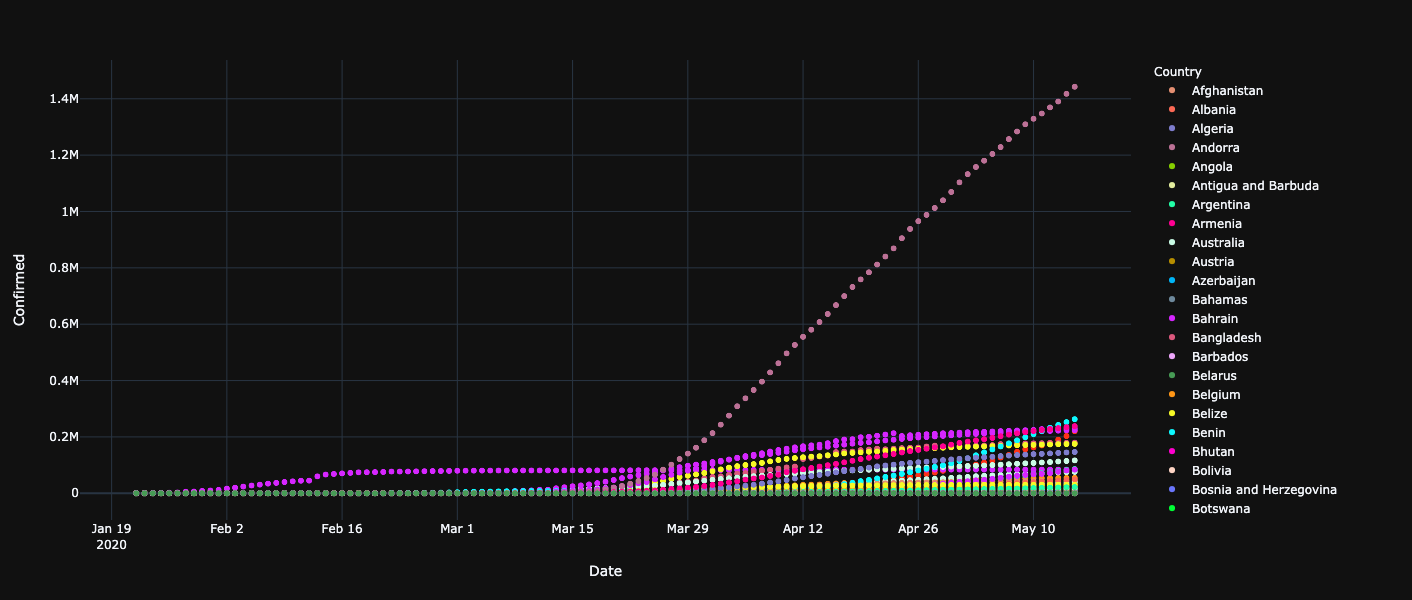

In [251]:
px.scatter(covid, x='Date', y='Confirmed', color='Country', color_discrete_sequence=px.colors.qualitative.Light24_r, template='plotly_dark', width=1000, height=600)

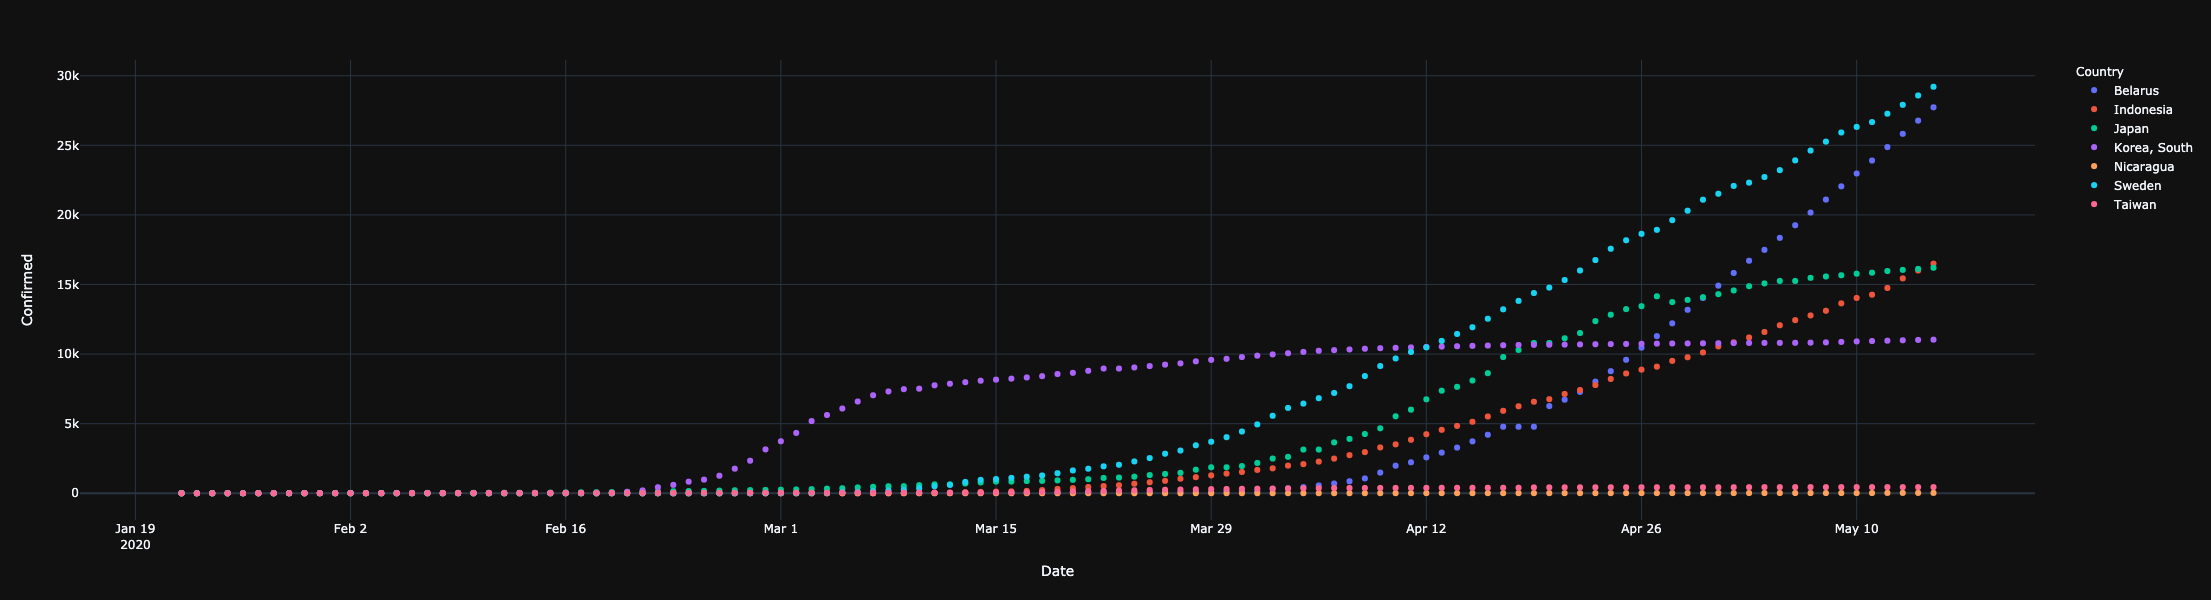

In [252]:
px.scatter(covid[covid.Country.isin(['Sweden','Korea, South','Japan','Indonesia','Taiwan','Belarus','Nicaragua'])], x='Date', y='Confirmed', color='Country', template='plotly_dark', width=1000, height=600)

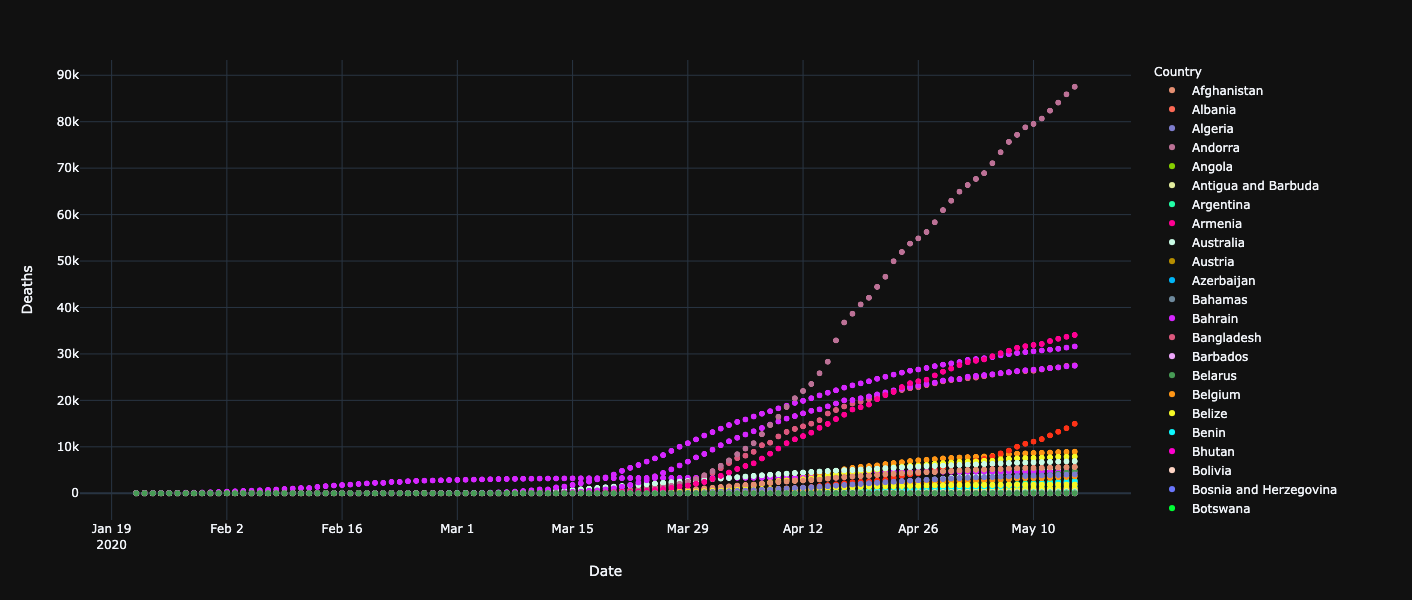

In [266]:
px.scatter(covid, x='Date', y='Deaths', color='Country', color_discrete_sequence=px.colors.qualitative.Light24_r, template='plotly_dark', width=1000, height=600)

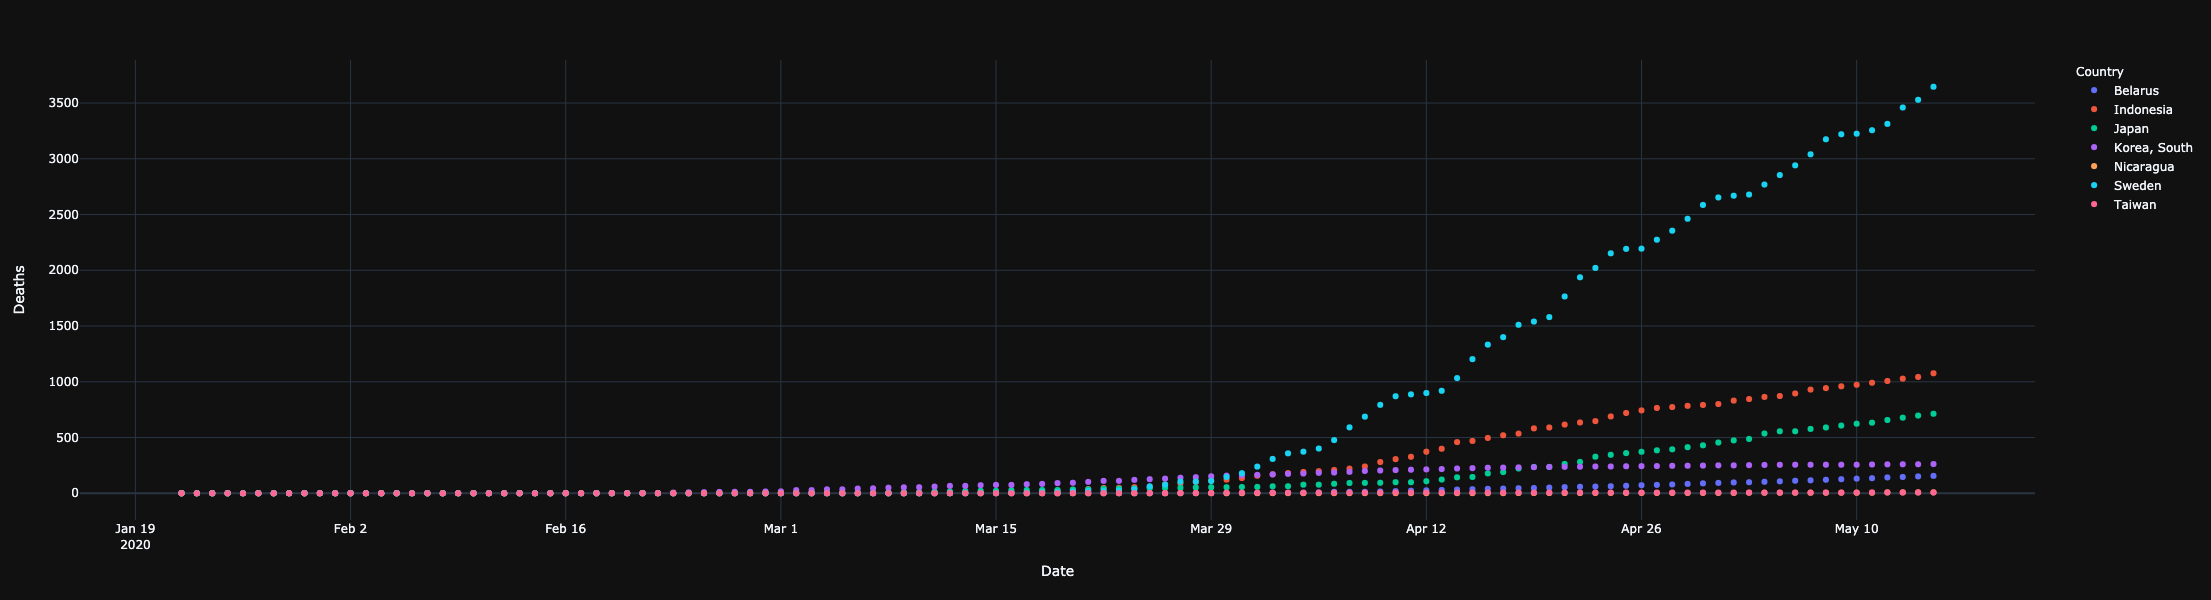

In [267]:
px.scatter(covid[covid.Country.isin(['Sweden','Korea, South','Japan','Indonesia','Taiwan','Belarus','Nicaragua'])], x='Date', y='Deaths', color='Country', template='plotly_dark', width=1000, height=600)

In [ ]:
'''
It seems that the lockdown effect in this time frame is very insignificant, like an ant trying to stop a train. This lockdown feature is overrun by features like population and economy.
Hypothesis: Economy would be an important feature because a good economy indicates a lot of traveling in and out a country. Population density is an obvious one.
Plan: Find lockdown countries that have similar population size to these and compare.
Find the most contributing factor to transmission among the lockdown countries, then among the non-lockdown countries, see if they match, if they do, then we know wether lockdown or not the most
important factor is still the same. Then find a lockdown country that is very similar to Sweden in almost everything (pop,gdp,lifeexp,culture,size,polution) to compare, if the variance/rate
of both countries are similar then lockdown has no say in this timeframe/dataset.

Result in findings: Lockdown does show a decrease in confirmed cases.
'''

In [ ]:
'''Discarding Google mobility data and lockdown by date data because the number of cases started to go up at the same time lockdown started. 
It is because people started lockdown and testing seriously at the same time.'''

# Import recover data

In [7]:
recover = pd.read_csv('covid_19_clean_complete/covid_19_clean_complete.csv')
recover

Province/State         Country/Region        Lat       Long     Date  \
0                NaN            Afghanistan  33.000000  65.000000  1/22/20   
1                NaN                Albania  41.153300  20.168300  1/22/20   
2                NaN                Algeria  28.033900   1.659600  1/22/20   
3                NaN                Andorra  42.506300   1.521800  1/22/20   
4                NaN                 Angola -11.202700  17.873900  1/22/20   
...              ...                    ...        ...        ...      ...   
36300            NaN  Sao Tome and Principe   0.186360   6.613081   6/6/20   
36301            NaN                  Yemen  15.552727  48.516388   6/6/20   
36302            NaN                Comoros -11.645500  43.333300   6/6/20   
36303            NaN             Tajikistan  38.861034  71.276093   6/6/20   
36304            NaN                Lesotho -29.609988  28.233608   6/6/20   

       Confirmed  Deaths  Recovered WHO Region  
0              0       0          0       emro  
1              0       0          0       euro  
2              0       0          0       afro  
3              0       0          0       euro  
4              0       0          0       afro  
...          ...     ...        ...        ...  
36300        499      12         68       afro  
36301        482     111          0       emro  
36302        141       2         67       afro  
36303       4453      48          0       euro  
36304          4       0          2       afro  

[36305 rows x 9 columns]

In [8]:
recover = recover.rename(columns={'Province/State':'State', 'Country/Region':'Country'})
recover.Date = recover.Date.astype('datetime64')
recover.Country = recover.Country.map(lambda c: 'Korea, South' if c == 'South Korea' else c)
recover.Country = recover.Country.map(lambda c: 'Taiwan' if c == 'Taiwan*' else c)
recover = recover.groupby(['Date', 'Country']).sum().drop(columns=['Lat','Long']).reset_index()
recover = recover[recover.Date <= '2020-05-15'].sort_values(['Date','Country'])

In [9]:
recover.Country.value_counts().shape

(188,)

In [10]:
covid.Country.value_counts().shape

(184,)

In [11]:
set(covid.Country.to_list()) - set(recover.Country.to_list())

set()

In [12]:
set(recover.Country.to_list()) - set(covid.Country.to_list())

{'Comoros', 'Lesotho', 'Tajikistan', 'Yemen'}

In [13]:
recover = recover[~recover.Country.isin(['Comoros','Lesotho','Tajikistan','Yemen'])]
recover = recover.reset_index().drop(columns='index')

In [14]:
covid['Recovered'] = recover.Recovered

In [15]:
recover

Date             Country  Confirmed  Deaths  Recovered
0     2020-01-22         Afghanistan          0       0          0
1     2020-01-22             Albania          0       0          0
2     2020-01-22             Algeria          0       0          0
3     2020-01-22             Andorra          0       0          0
4     2020-01-22              Angola          0       0          0
...          ...                 ...        ...     ...        ...
21155 2020-05-15             Vietnam        314       0        260
21156 2020-05-15  West Bank and Gaza        375       2        315
21157 2020-05-15      Western Sahara          6       0          6
21158 2020-05-15              Zambia        654       7        124
21159 2020-05-15            Zimbabwe         42       4         13

[21160 rows x 5 columns]

In [16]:
covid

DayNum       Date             Country  Confirmed  Deaths  Recovered
0           1 2020-01-22         Afghanistan          0       0          0
1           1 2020-01-22             Albania          0       0          0
2           1 2020-01-22             Algeria          0       0          0
3           1 2020-01-22             Andorra          0       0          0
4           1 2020-01-22              Angola          0       0          0
...       ...        ...                 ...        ...     ...        ...
21155     115 2020-05-15             Vietnam        314       0        260
21156     115 2020-05-15  West Bank and Gaza        375       2        315
21157     115 2020-05-15      Western Sahara          6       0          6
21158     115 2020-05-15              Zambia        654       7        124
21159     115 2020-05-15            Zimbabwe         42       4         13

[21160 rows x 6 columns]

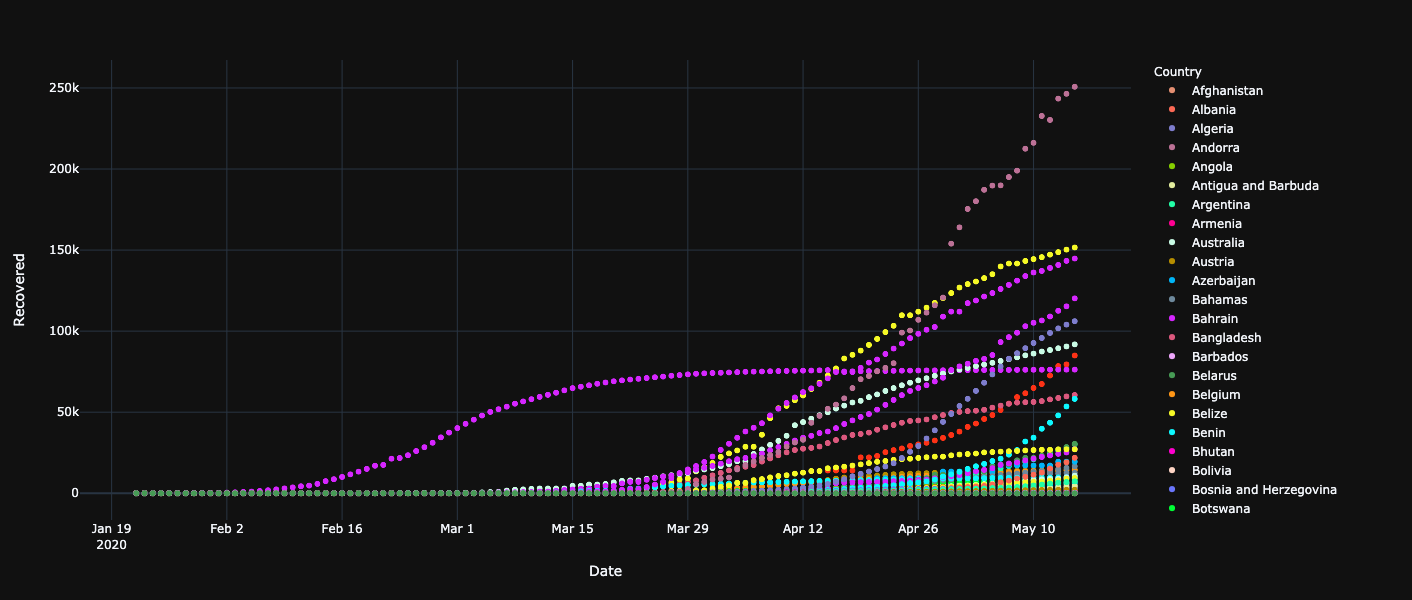

In [264]:
px.scatter(covid, x='Date', y='Recovered', color='Country', color_discrete_sequence=px.colors.qualitative.Light24_r, template='plotly_dark', width=1000, height=600)

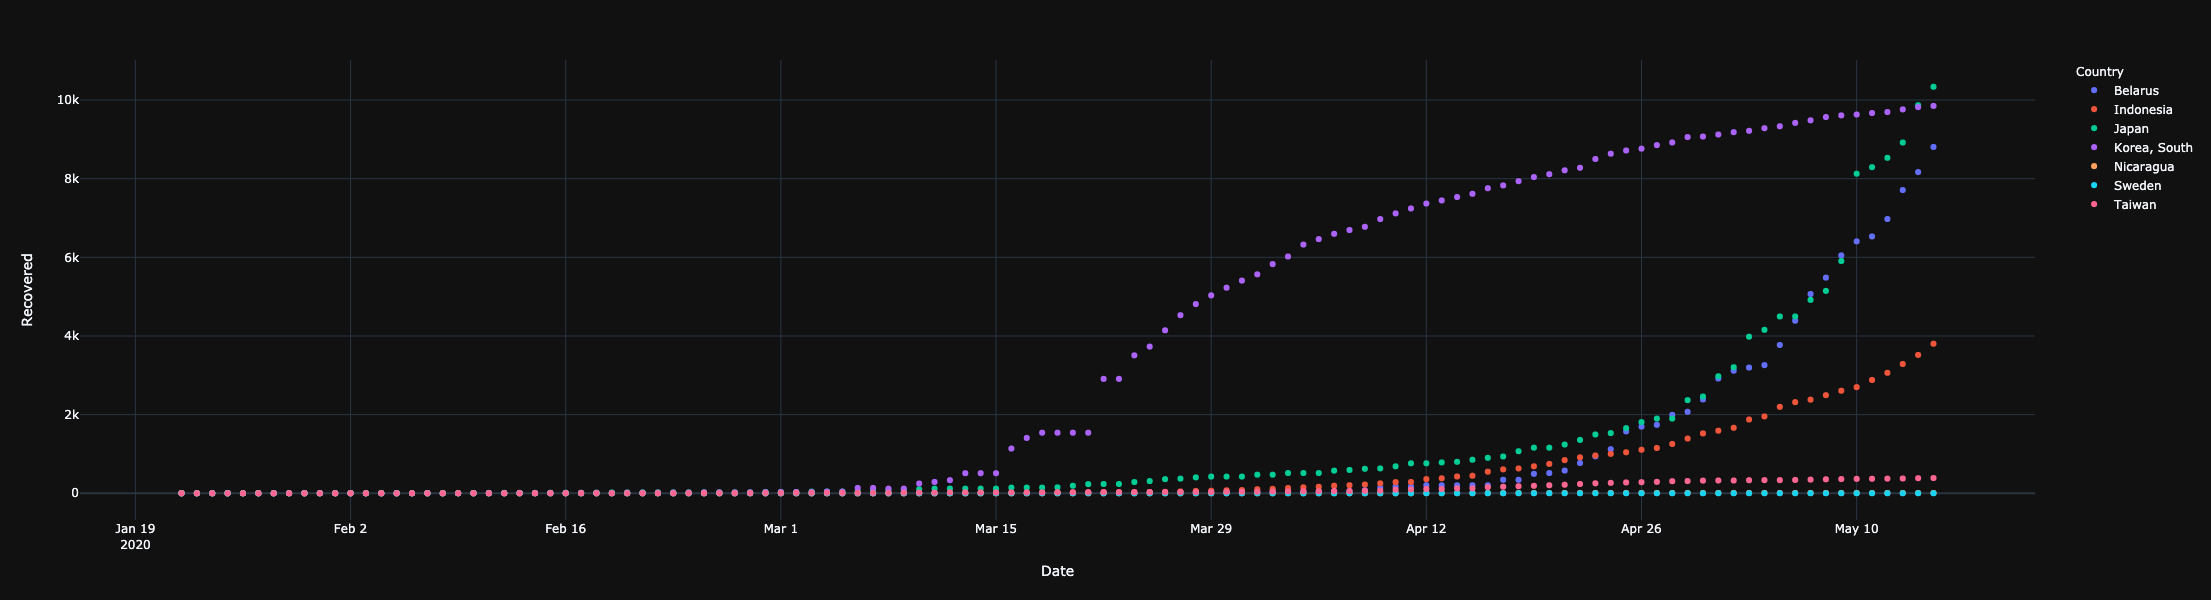

In [265]:
px.scatter(covid[covid.Country.isin(['Sweden','Korea, South','Japan','Indonesia','Taiwan','Belarus','Nicaragua'])], x='Date', y='Recovered', color='Country', template='plotly_dark', width=1000, height=600)

# Import usefulfeats data

In [17]:
usefulfeats = pd.read_csv('covid19_useful_features by_country/covid19_useful_features by_country.csv')
usefulfeats.head()

Country_Region  Population_Size  Tourism Date_FirstFatality  \
0    Afghanistan         37172386    14000         2020-03-23   
1        Albania          2866376  5340000         2020-03-12   
2        Algeria         42228429  2657000         2020-03-13   
3        Andorra            77006  3042000         2020-03-23   
4         Angola         30809762   218000         2020-03-30   

  Date_FirstConfirmedCase   Latitude  Longtitude  Mean_Age Lockdown_Date  \
0              2020-02-25  33.939110   67.709953      17.3    2020-03-24   
1              2020-03-10  41.153332   20.168331      36.2    2020-03-08   
2              2020-02-26  28.033886    1.659626      27.5    2020-03-24   
3              2020-03-03  42.546245    1.601554      37.0    2020-03-16   
4              2020-03-21 -11.202692   17.873887      16.4           NaN   

  Lockdown_Type Country_Code  
0          Full          AFG  
1          Full          ALB  
2          Full          DZA  
3          Full          AND  
4           NaN          AGO

In [18]:
usefulfeats = usefulfeats.rename(columns={'Country_Region':'Country', 'Population_Size':'Population', 'Date_FirstFatality':'FirstDeath', 'Date_FirstConfirmedCase':'FirstConfirmed', 'Mean_Age':'AgeMean', 'Lockdown_Date':'Lockdown'})
usefulfeats.Country = usefulfeats.Country.map(lambda c: 'Taiwan' if c == 'Taiwan*' else c)

In [19]:
set(covid.Country.to_list()) - set(usefulfeats.Country.to_list())

set()

In [20]:
set(usefulfeats.Country.to_list()) - set(covid.Country.to_list())

set()

In [21]:
usefulfeats = usefulfeats.drop(columns=['Latitude','Longtitude','Lockdown_Type','Country_Code'])

In [22]:
covid = covid.merge(usefulfeats, how='left', on='Country')

In [23]:
covid

DayNum       Date             Country  Confirmed  Deaths  Recovered  \
0           1 2020-01-22         Afghanistan          0       0          0   
1           1 2020-01-22             Albania          0       0          0   
2           1 2020-01-22             Algeria          0       0          0   
3           1 2020-01-22             Andorra          0       0          0   
4           1 2020-01-22              Angola          0       0          0   
...       ...        ...                 ...        ...     ...        ...   
21155     115 2020-05-15             Vietnam        314       0        260   
21156     115 2020-05-15  West Bank and Gaza        375       2        315   
21157     115 2020-05-15      Western Sahara          6       0          6   
21158     115 2020-05-15              Zambia        654       7        124   
21159     115 2020-05-15            Zimbabwe         42       4         13   

       Population   Tourism  FirstDeath FirstConfirmed  AgeMean    Lockdown  
0        37172386     14000  2020-03-23     2020-02-25     17.3  2020-03-24  
1         2866376   5340000  2020-03-12     2020-03-10     36.2  2020-03-08  
2        42228429   2657000  2020-03-13     2020-02-26     27.5  2020-03-24  
3           77006   3042000  2020-03-23     2020-03-03     37.0  2020-03-16  
4        30809762    218000  2020-03-30     2020-03-21     16.4         NaN  
...           ...       ...         ...            ...      ...         ...  
21155    95540395  15498000         NaN     2020-01-24     37.0  2020-03-19  
21156     4569087    606000  2020-03-27     2020-03-06     37.0  2020-04-09  
21157      500000     14000         NaN     2020-04-06     26.8  2020-03-20  
21158    17351822   1072000  2020-04-03     2020-03-19     17.1         NaN  
21159    14439018   2580000  2020-03-24     2020-03-21     19.0  2020-03-30  

[21160 rows x 12 columns]

# Import population2020 data

In [24]:
pop20 = pd.read_csv('population_by_country_2020/population_by_country_2020.csv')
pop20

Country (or dependency)  Population (2020) Yearly Change  Net Change  \
0                     China         1438207241        0.39 %     5540090   
1                     India         1377233523        0.99 %    13586631   
2             United States          330610570        0.59 %     1937734   
3                 Indonesia          272931713        1.07 %     2898047   
4                  Pakistan          219992900        2.00 %     4327022   
..                      ...                ...           ...         ...   
230              Montserrat               4991        0.06 %           3   
231        Falkland Islands               3458        3.05 %         103   
232                    Niue               1624        0.68 %          11   
233                 Tokelau               1354        1.27 %          17   
234                Holy See                801        0.25 %           2   

     Density (P/Km²)  Land Area (Km²)  Migrants (net) Fert. Rate Med. Age  \
0                153          9388211       -348399.0        1.7       38   
1                464          2973190       -532687.0        2.2       28   
2                 36          9147420        954806.0        1.8       38   
3                151          1811570        -98955.0        2.3       30   
4                287           770880       -233379.0        3.6       23   
..               ...              ...             ...        ...      ...   
230               50              100             NaN       N.A.     N.A.   
231                0            12170             NaN       N.A.     N.A.   
232                6              260             NaN       N.A.     N.A.   
233              136               10             NaN       N.A.     N.A.   
234             2003                0             NaN       N.A.     N.A.   

    Urban Pop % World Share  
0          61 %     18.47 %  
1          35 %     17.70 %  
2          83 %      4.25 %  
3          56 %      3.51 %  
4          35 %      2.83 %  
..          ...         ...  
230        10 %      0.00 %  
231        66 %      0.00 %  
232        46 %      0.00 %  
233         0 %      0.00 %  
234        N.A.      0.00 %  

[235 rows x 11 columns]

In [25]:
pop20 = pop20.rename(columns={'Country (or dependency)':'Country', 'Population (2020)':'Population', 'Density (P/Km²)':'DensityPKm2', 'Migrants (net)':'Migrants', 'Med. Age':'AgeMedian', 'Urban Pop %':'UrbanPopPercent'})
pop20 = pop20.drop(columns=['Yearly Change','Net Change','Land Area (Km²)','Fert. Rate','World Share'])
pop20.UrbanPopPercent = pop20.UrbanPopPercent.str.replace(' %','')

In [26]:
pop20.Country = pop20.Country.str.replace("Côte d'Ivoire", "Cote d'Ivoire")
pop20.Country = pop20.Country.str.replace('Czech Republic (Czechia)', 'Czechia', regex=False)
pop20.Country = pop20.Country.str.replace('South Korea', 'Korea, South')
pop20.Country = pop20.Country.str.replace('Saint Kitts & Nevis', 'Saint Kitts and Nevis')
pop20.Country = pop20.Country.str.replace('St. Vincent & Grenadines', 'Saint Vincent and the Grenadines')
pop20.Country = pop20.Country.str.replace('Sao Tome & Principe', 'Sao Tome and Principe')
pop20.Country = pop20.Country.str.replace('United States', 'US')

In [27]:
set(covid.Country.to_list()) - set(pop20.Country.to_list())

{'Burma',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Diamond Princess',
 'Kosovo',
 'MS Zaandam',
 'West Bank and Gaza'}

In [28]:
set(pop20.Country.to_list()) - set(covid.Country.to_list())

{'American Samoa',
 'Anguilla',
 'Aruba',
 'Bermuda',
 'British Virgin Islands',
 'Caribbean Netherlands',
 'Cayman Islands',
 'Channel Islands',
 'Comoros',
 'Congo',
 'Cook Islands',
 'Curaçao',
 'DR Congo',
 'Faeroe Islands',
 'Falkland Islands',
 'French Guiana',
 'French Polynesia',
 'Gibraltar',
 'Greenland',
 'Guadeloupe',
 'Guam',
 'Hong Kong',
 'Isle of Man',
 'Kiribati',
 'Lesotho',
 'Macao',
 'Marshall Islands',
 'Martinique',
 'Mayotte',
 'Micronesia',
 'Montserrat',
 'Myanmar',
 'Nauru',
 'New Caledonia',
 'Niue',
 'North Korea',
 'Northern Mariana Islands',
 'Palau',
 'Puerto Rico',
 'Réunion',
 'Saint Barthelemy',
 'Saint Helena',
 'Saint Martin',
 'Saint Pierre & Miquelon',
 'Samoa',
 'Sint Maarten',
 'Solomon Islands',
 'State of Palestine',
 'Tajikistan',
 'Tokelau',
 'Tonga',
 'Turkmenistan',
 'Turks and Caicos',
 'Tuvalu',
 'U.S. Virgin Islands',
 'Vanuatu',
 'Wallis & Futuna',
 'Yemen'}

In [29]:
covid = covid[~covid.Country.isin(set(covid.Country.to_list()) - set(pop20.Country.to_list()))]
pop20 = pop20[~pop20.Country.isin(set(pop20.Country.to_list()) - set(covid.Country.to_list()))]

In [30]:
set(covid.Country.to_list()) - set(pop20.Country.to_list())

set()

In [31]:
set(pop20.Country.to_list()) - set(covid.Country.to_list())

set()

In [32]:
pop20 = pop20.sort_values('Country').reset_index().drop(columns='index')
covid = covid.drop(columns='Population')
covid = covid.merge(pop20, on='Country', how='left')

In [33]:
covid

DayNum       Date         Country  Confirmed  Deaths  Recovered  \
0           1 2020-01-22     Afghanistan          0       0          0   
1           1 2020-01-22         Albania          0       0          0   
2           1 2020-01-22         Algeria          0       0          0   
3           1 2020-01-22         Andorra          0       0          0   
4           1 2020-01-22          Angola          0       0          0   
...       ...        ...             ...        ...     ...        ...   
20350     115 2020-05-15       Venezuela        459      10        229   
20351     115 2020-05-15         Vietnam        314       0        260   
20352     115 2020-05-15  Western Sahara          6       0          6   
20353     115 2020-05-15          Zambia        654       7        124   
20354     115 2020-05-15        Zimbabwe         42       4         13   

        Tourism  FirstDeath FirstConfirmed  AgeMean    Lockdown  Population  \
0         14000  2020-03-23     2020-02-25     17.3  2020-03-24    38742911   
1       5340000  2020-03-12     2020-03-10     36.2  2020-03-08     2878420   
2       2657000  2020-03-13     2020-02-26     27.5  2020-03-24    43685618   
3       3042000  2020-03-23     2020-03-03     37.0  2020-03-16       77240   
4        218000  2020-03-30     2020-03-21     16.4         NaN    32644783   
...         ...         ...            ...      ...         ...         ...   
20350     14000  2020-03-28     2020-03-15     37.0  2020-03-16    28451828   
20351  15498000         NaN     2020-01-24     37.0  2020-03-19    97160127   
20352     14000         NaN     2020-04-06     26.8  2020-03-20      594215   
20353   1072000  2020-04-03     2020-03-19     17.1         NaN    18273379   
20354   2580000  2020-03-24     2020-03-21     19.0  2020-03-30    14818157   

       DensityPKm2  Migrants AgeMedian UrbanPopPercent  
0               60  -62920.0        18              25  
1              105  -14000.0        36              63  
2               18  -10000.0        29              73  
3              164       NaN      N.A.              88  
4               26    6413.0        17              67  
...            ...       ...       ...             ...  
20350           32 -653249.0        30            N.A.  
20351          314  -80000.0        32              38  
20352            2    5582.0        28              87  
20353           25   -8000.0        18              45  
20354           38 -116858.0        19              38  

[20355 rows x 16 columns]

In [34]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20355 entries, 0 to 20354
Data columns (total 16 columns):
DayNum             20355 non-null int64
Date               20355 non-null datetime64[ns]
Country            20355 non-null object
Confirmed          20355 non-null int64
Deaths             20355 non-null int64
Recovered          20355 non-null int64
Tourism            20355 non-null int64
FirstDeath         17135 non-null object
FirstConfirmed     20355 non-null object
AgeMean            20355 non-null float64
Lockdown           16905 non-null object
Population         20355 non-null int64
DensityPKm2        20355 non-null int64
Migrants           19550 non-null float64
AgeMedian          20355 non-null object
UrbanPopPercent    20355 non-null object
dtypes: datetime64[ns](1), float64(2), int64(7), object(6)
memory usage: 2.6+ MB


# Import overweight data

In [65]:
overweight = pd.read_csv('who-overweight-by-country-2016/who-overweight-by-country-2016.csv')
overweight

Unnamed: 0  Both.sexes  Male  Female
0                           Afghanistan        19.7  17.1    22.2
1                               Albania        58.7  64.9    52.8
2                               Algeria        60.7  56.7    64.8
3                               Andorra        68.1  74.5    61.9
4                                Angola        23.9  17.2    30.4
..                                  ...         ...   ...     ...
190  Venezuela (Bolivarian Republic of)        62.6  62.0    63.2
191                            Viet Nam        18.3  15.9    20.5
192                               Yemen        42.3  38.3    46.3
193                              Zambia        23.9  16.7    31.0
194                            Zimbabwe        32.4  18.8    45.5

[195 rows x 4 columns]

In [66]:
overweight = overweight.rename(columns={'Unnamed: 0':'Country', 'Both.sexes':'Overweight'}).drop(columns=['Male', 'Female'])

In [67]:
overweight

Country  Overweight
0                           Afghanistan        19.7
1                               Albania        58.7
2                               Algeria        60.7
3                               Andorra        68.1
4                                Angola        23.9
..                                  ...         ...
190  Venezuela (Bolivarian Republic of)        62.6
191                            Viet Nam        18.3
192                               Yemen        42.3
193                              Zambia        23.9
194                            Zimbabwe        32.4

[195 rows x 2 columns]

In [68]:
covid.Country.unique().shape[0]

177

In [69]:
set(covid.Country.to_list()) - set(overweight.Country.to_list())

{'Bolivia',
 'Brunei',
 "Cote d'Ivoire",
 'Holy See',
 'Iran',
 'Korea, South',
 'Laos',
 'Liechtenstein',
 'Moldova',
 'North Macedonia',
 'Russia',
 'Syria',
 'Taiwan',
 'Tanzania',
 'US',
 'United Kingdom',
 'Venezuela',
 'Vietnam',
 'Western Sahara'}

In [70]:
set(overweight.Country.to_list()) - set(covid.Country.to_list())

{'Bolivia (Plurinational State of)',
 'Brunei Darussalam',
 'Comoros',
 'Congo',
 'Cook Islands',
 "Côte d'Ivoire",
 "Democratic People's Republic of Korea",
 'Democratic Republic of the Congo',
 'Iran (Islamic Republic of)',
 'Kiribati',
 "Lao People's Democratic Republic",
 'Lesotho',
 'Marshall Islands',
 'Micronesia (Federated States of)',
 'Myanmar',
 'Nauru',
 'Niue',
 'Palau',
 'Republic of Korea',
 'Republic of Moldova',
 'Republic of North Macedonia',
 'Russian Federation',
 'Samoa',
 'Solomon Islands',
 'Sudan (former)',
 'Syrian Arab Republic',
 'Tajikistan',
 'Tonga',
 'Turkmenistan',
 'Tuvalu',
 'United Kingdom of Great Britain and Northern Ireland',
 'United Republic of Tanzania',
 'United States of America',
 'Vanuatu',
 'Venezuela (Bolivarian Republic of)',
 'Viet Nam',
 'Yemen'}

In [71]:
overweight.Country = overweight.Country.str.replace("Côte d'Ivoire", "Cote d'Ivoire")
overweight.Country = overweight.Country.str.replace("Bolivia (Plurinational State of)", "Bolivia", regex=False)
overweight.Country = overweight.Country.str.replace("Brunei Darussalam", "Brunei")
overweight.Country = overweight.Country.str.replace("Iran (Islamic Republic of)", "Iran", regex=False)
overweight.Country = overweight.Country.str.replace("Republic of Korea", "Korea, South")
overweight.Country = overweight.Country.str.replace("Lao People's Democratic Republic", "Laos")
overweight.Country = overweight.Country.str.replace("Republic of Moldova", "Moldova")
overweight.Country = overweight.Country.str.replace("Republic of North Macedonia", "North Macedonia")
overweight.Country = overweight.Country.str.replace("Russian Federation", "Russia")
overweight.Country = overweight.Country.str.replace("Syrian Arab Republic", "Syria")
overweight.Country = overweight.Country.str.replace("United Republic of Tanzania", "Tanzania")
overweight.Country = overweight.Country.str.replace("United States of America", "US")
overweight.Country = overweight.Country.str.replace("United Kingdom of Great Britain and Northern Ireland", "United Kingdom")
overweight.Country = overweight.Country.str.replace("Venezuela (Bolivarian Republic of)", "Venezuela", regex=False)
overweight.Country = overweight.Country.str.replace("Viet Nam", "Vietnam")

In [72]:
set(covid.Country.to_list()) - set(overweight.Country.to_list())

{'Holy See', 'Liechtenstein', 'Taiwan', 'Western Sahara'}

In [73]:
set(overweight.Country.to_list()) - set(covid.Country.to_list())

{'Comoros',
 'Congo',
 'Cook Islands',
 "Democratic People's Korea, South",
 'Democratic Republic of the Congo',
 'Kiribati',
 'Lesotho',
 'Marshall Islands',
 'Micronesia (Federated States of)',
 'Myanmar',
 'Nauru',
 'Niue',
 'Palau',
 'Samoa',
 'Solomon Islands',
 'Sudan (former)',
 'Tajikistan',
 'Tonga',
 'Turkmenistan',
 'Tuvalu',
 'Vanuatu',
 'Yemen'}

In [74]:
covid = covid[~covid.Country.isin(['Holy See', 'Liechtenstein', 'Western Sahara'])]
overweight = overweight[~overweight.Country.isin(set(overweight.Country.to_list()) - set(covid.Country.to_list()))]

In [75]:
set(covid.Country.to_list()) - set(overweight.Country.to_list())

{'Taiwan'}

In [76]:
set(overweight.Country.to_list()) - set(covid.Country.to_list())

set()

In [81]:
# fillna 41.7 for taiwan, taken from malaysia
covid = covid.merge(overweight, on='Country', how='left').fillna(41.7)

In [98]:
# Do same for obesity
obesity = pd.read_csv('who-obesity-by-country-2016/who-obesity-by-country-2016.csv')
obesity

Unnamed: 0  Both.sexes  Male  Female
0                           Afghanistan         4.5   2.7     6.2
1                               Albania        22.3  21.9    22.8
2                               Algeria        26.6  19.4    34.0
3                               Andorra        28.0  27.9    28.1
4                                Angola         6.8   3.5    10.0
..                                  ...         ...   ...     ...
190  Venezuela (Bolivarian Republic of)        25.2  22.1    28.3
191                            Viet Nam         2.1   1.6     2.6
192                               Yemen        14.1   9.9    18.2
193                              Zambia         6.5   3.0    10.0
194                            Zimbabwe        12.3   3.7    20.5

[195 rows x 4 columns]

In [99]:
obesity = obesity.rename(columns={'Unnamed: 0':'Country', 'Both.sexes':'Obesity'}).drop(columns=['Male', 'Female'])

In [100]:
obesity

Country  Obesity
0                           Afghanistan      4.5
1                               Albania     22.3
2                               Algeria     26.6
3                               Andorra     28.0
4                                Angola      6.8
..                                  ...      ...
190  Venezuela (Bolivarian Republic of)     25.2
191                            Viet Nam      2.1
192                               Yemen     14.1
193                              Zambia      6.5
194                            Zimbabwe     12.3

[195 rows x 2 columns]

In [101]:
obesity.Country = obesity.Country.str.replace("Côte d'Ivoire", "Cote d'Ivoire")
obesity.Country = obesity.Country.str.replace("Bolivia (Plurinational State of)", "Bolivia", regex=False)
obesity.Country = obesity.Country.str.replace("Brunei Darussalam", "Brunei")
obesity.Country = obesity.Country.str.replace("Iran (Islamic Republic of)", "Iran", regex=False)
obesity.Country = obesity.Country.str.replace("Republic of Korea", "Korea, South")
obesity.Country = obesity.Country.str.replace("Lao People's Democratic Republic", "Laos")
obesity.Country = obesity.Country.str.replace("Republic of Moldova", "Moldova")
obesity.Country = obesity.Country.str.replace("Republic of North Macedonia", "North Macedonia")
obesity.Country = obesity.Country.str.replace("Russian Federation", "Russia")
obesity.Country = obesity.Country.str.replace("Syrian Arab Republic", "Syria")
obesity.Country = obesity.Country.str.replace("United Republic of Tanzania", "Tanzania")
obesity.Country = obesity.Country.str.replace("United States of America", "US")
obesity.Country = obesity.Country.str.replace("United Kingdom of Great Britain and Northern Ireland", "United Kingdom")
obesity.Country = obesity.Country.str.replace("Venezuela (Bolivarian Republic of)", "Venezuela", regex=False)
obesity.Country = obesity.Country.str.replace("Viet Nam", "Vietnam")

In [102]:
obesity = obesity[~obesity.Country.isin(set(obesity.Country.to_list()) - set(covid.Country.to_list()))]

In [103]:
set(covid.Country.to_list()) - set(obesity.Country.to_list())

{'Taiwan'}

In [104]:
set(obesity.Country.to_list()) - set(covid.Country.to_list())

set()

In [105]:
# fillna 15.3 for taiwan, taken from malaysia
covid = covid.merge(obesity, on='Country', how='left').fillna(15.3)

In [116]:
covid

DayNum       Date      Country  Confirmed  Deaths  Recovered   Tourism  \
0           1 2020-01-22  Afghanistan          0       0          0     14000   
1           1 2020-01-22      Albania          0       0          0   5340000   
2           1 2020-01-22      Algeria          0       0          0   2657000   
3           1 2020-01-22      Andorra          0       0          0   3042000   
4           1 2020-01-22       Angola          0       0          0    218000   
...       ...        ...          ...        ...     ...        ...       ...   
20005     115 2020-05-15   Uzbekistan       2686      11       2158   5346000   
20006     115 2020-05-15    Venezuela        459      10        229     14000   
20007     115 2020-05-15      Vietnam        314       0        260  15498000   
20008     115 2020-05-15       Zambia        654       7        124   1072000   
20009     115 2020-05-15     Zimbabwe         42       4         13   2580000   

       FirstDeath FirstConfirmed  AgeMean    Lockdown  Population  \
0      2020-03-23     2020-02-25     17.3  2020-03-24    38742911   
1      2020-03-12     2020-03-10     36.2  2020-03-08     2878420   
2      2020-03-13     2020-02-26     27.5  2020-03-24    43685618   
3      2020-03-23     2020-03-03     37.0  2020-03-16       77240   
4      2020-03-30     2020-03-21     16.4        18.3    32644783   
...           ...            ...      ...         ...         ...   
20005  2020-03-28     2020-03-16     26.3  2020-03-20    33368859   
20006  2020-03-28     2020-03-15     37.0  2020-03-16    28451828   
20007        18.3     2020-01-24     37.0  2020-03-19    97160127   
20008  2020-04-03     2020-03-19     17.1        18.3    18273379   
20009  2020-03-24     2020-03-21     19.0  2020-03-30    14818157   

       DensityPKm2  Migrants AgeMedian UrbanPopPercent  Overweight  Obesity  
0               60  -62920.0        18              25        19.7      4.5  
1              105  -14000.0        36              63        58.7     22.3  
2               18  -10000.0        29              73        60.7     26.6  
3              164      18.3      N.A.              88        68.1     28.0  
4               26    6413.0        17              67        23.9      6.8  
...            ...       ...       ...             ...         ...      ...  
20005           79   -8863.0        28              50        45.7     15.3  
20006           32 -653249.0        30            N.A.        62.6     25.2  
20007          314  -80000.0        32              38        18.3      2.1  
20008           25   -8000.0        18              45        23.9      6.5  
20009           38 -116858.0        19              38        32.4     12.3  

[20010 rows x 18 columns]

# Import UN data

In [128]:
un = pd.read_csv('undata-country-profiles/undata-country-profiles.csv')
un

country          Region Surface area (km2)  \
0                  Afghanistan    SouthernAsia             652864   
1                      Albania  SouthernEurope              28748   
2                      Algeria  NorthernAfrica            2381741   
3               American Samoa       Polynesia                199   
4                      Andorra  SouthernEurope                468   
..                         ...             ...                ...   
224  Wallis and Futuna Islands       Polynesia                142   
225             Western Sahara  NorthernAfrica             266000   
226                      Yemen     WesternAsia             527968   
227                     Zambia   EasternAfrica             752612   
228                   Zimbabwe   EasternAfrica             390757   

     Population in thousands (2017)  Population density (per km2, 2017)  \
0                             35530                                54.4   
1                              2930                               106.9   
2                             41318                                17.3   
3                                56                               278.2   
4                                77                               163.8   
..                              ...                                 ...   
224                              12                                84.1   
225                             553                                 2.1   
226                           28250                                53.5   
227                           17094                                23.0   
228                           16530                                42.7   

     Sex ratio (m per 100 f, 2017)  \
0                            106.3   
1                            101.9   
2                            102.0   
3                            103.6   
4                            102.3   
..                             ...   
224                           93.4   
225                          110.1   
226                          102.1   
227                           98.5   
228                           95.0   

     GDP: Gross domestic product (million current US$)  \
0                                                20270   
1                                                11541   
2                                               164779   
3                                                  -99   
4                                                 2812   
..                                                 ...   
224                                                -99   
225                                                -99   
226                                              29688   
227                                              21255   
228                                              13893   

    GDP growth rate (annual %, const. 2005 prices)  \
0                                             -2.4   
1                                              2.6   
2                                              3.8   
3                                              -99   
4                                              0.8   
..                                             ...   
224                                            -99   
225                                            -99   
226                                          -28.1   
227                                            2.9   
228                                            1.1   

     GDP per capita (current US$) Economy: Agriculture (% of GVA)  \
0                           623.2                            23.3   
1                          3984.2                            22.4   
2                          4154.1                            12.2   
3                           -99.0                             -99   
4                         39896.4                             0.5   
..                            ...                             ...   
224    

In [176]:
un = un.rename(columns={'country':'Country', 'Sex ratio (m per 100 f, 2017)':'SexRatioM100F', 'GDP per capita (current US$)':'GDPPerCapitaUS', 'Unemployment (% of labour force)':'Unemployment', 'Health: Total expenditure (% of GDP)':'HealthExpenditureGDP', 'CO2 emission estimates (million tons/tons per capita)':'CO2Emission'})
un = un[['Country','SexRatioM100F','GDPPerCapitaUS','Unemployment','HealthExpenditureGDP','CO2Emission']]
un = un[~un.Unemployment.isin(['...','-99'])]
un.Unemployment = un.Unemployment.astype(float)
un = un[~(un.GDPPerCapitaUS == -99)]
un = un[~(un.HealthExpenditureGDP == -99)]
un = un[~(un.CO2Emission == -99)]

In [308]:
un

Country  SexRatioM100F  GDPPerCapitaUS  \
0                           Afghanistan          106.3           623.2   
1                               Albania          101.9          3984.2   
2                               Algeria          102.0          4154.1   
5                                Angola           96.2          4714.1   
8                             Argentina           95.9         14564.5   
..                                  ...            ...             ...   
222  Venezuela (Bolivarian Republic of)           99.0         11068.9   
223                            Viet Nam           98.0          2067.9   
226                               Yemen          102.1          1106.4   
227                              Zambia           98.5          1311.1   
228                            Zimbabwe           95.0           890.4   

     Unemployment  HealthExpenditureGDP  CO2Emission  
0             8.6                   8.2           63  
1            15.8                   5.9           84  
2            11.4                   7.2         5900  
5             6.6                   3.3         3902  
8             6.5                   4.8         3167  
..            ...                   ...          ...  
222           6.6                   5.3         7460  
223           2.2                   7.1         2977  
226          16.1                   5.6          668  
227           7.4                   5.0          374  
228           5.0                   6.0          482  

[176 rows x 6 columns]

In [889]:
def rename_country(c):
    if c in ["Côte d'Ivoire"]: c = "Cote d'Ivoire"
    elif c in ["Bolivia (Plurinational State of)"]: c = "Bolivia"
    elif c in ["Brunei Darussalam"]: c = "Brunei"
    elif c in ["Czech Republic", "Czech Republic (Czechia)"]: c = "Czechia"
    elif c in ["Iran (Islamic Republic of)"]: c = "Iran"
    elif c in ["Lao People's Democratic Republic"]: c = "Laos"
    elif c in ["Republic of Moldova"]: c = "Moldova"
    elif c in ["Republic of North Macedonia"]: c = "North Macedonia"
    elif c in ["Russian Federation"]: c = "Russia"
    elif c in ["Saint Kitts & Nevis"]: c = "Saint Kitts and Nevis"
    elif c in ["Sao Tome & Principe"]: c = "Sao Tome and Principe"
    elif c in ["South Korea", "Republic of Korea", "Korea South"]: c = "Korea, South"
    elif c in ["St. Vincent & Grenadines"]: c = "Saint Vincent and the Grenadines"
    elif c in ["Syrian Arab Republic"]: c = "Syria"
    elif c in ["Taiwan Province of China", "Taiwan*"]: c = "Taiwan"
    elif c in ["United Republic of Tanzania"]: c = "Tanzania"
    elif c in ["United States", "United States of America"]: c = "US"
    elif c in ["United Kingdom of Great Britain and Northern Ireland"]: c = "United Kingdom"
    elif c in ["Venezuela (Bolivarian Republic of)", "Venezuela"]: c = "Venezuela"
    elif c in ["Viet Nam"]: c = "Vietnam"
    return c

In [322]:
un.Country = un.Country.map(lambda c: rename_country(c))

In [330]:
colist = list(set(covid.Country.unique()) - set(un.Country.unique()))
colist.remove('Taiwan')
colist

['Antigua and Barbuda',
 'Somalia',
 'South Sudan',
 'Grenada',
 'Eswatini',
 'Namibia',
 'Saint Kitts and Nevis',
 'Dominica',
 'Monaco',
 "Cote d'Ivoire",
 'San Marino',
 'Andorra',
 'North Macedonia']

In [331]:
unlist = list(set(un.Country.unique()) - set(covid.Country.unique()))
unlist

['Yemen',
 'Myanmar',
 'Tajikistan',
 'Democratic Republic of the Congo',
 'Samoa',
 'Vanuatu',
 'Turkmenistan',
 'Comoros',
 'Solomon Islands',
 'Congo',
 'Lesotho',
 'Marshall Islands',
 'Nauru',
 'Tonga',
 'Swaziland',
 'The former Yugoslav Republic of Macedonia']

In [334]:
covid = covid[~covid.Country.isin(colist)]

In [335]:
un = un[~un.Country.isin(unlist)]

In [336]:
set(covid.Country.unique()) - set(un.Country.unique())

{'Taiwan'}

In [337]:
set(un.Country.unique()) - set(covid.Country.unique())

set()

In [348]:
covid = covid.merge(un, on='Country', how='left').fillna({'SexRatioM100F':98.6, 'GDPPerCapitaUS':24390, 'Unemployment':3.76, 'HealthExpenditureGDP':6.4, 'CO2Emission':12020})

In [366]:
covid

DayNum       Date      Country  Confirmed  Deaths  Recovered   Tourism  \
0           1 2020-01-22  Afghanistan          0       0          0     14000   
1           1 2020-01-22      Albania          0       0          0   5340000   
2           1 2020-01-22      Algeria          0       0          0   2657000   
3           1 2020-01-22       Angola          0       0          0    218000   
4           1 2020-01-22    Argentina          0       0          0   6942000   
...       ...        ...          ...        ...     ...        ...       ...   
18510     115 2020-05-15   Uzbekistan       2686      11       2158   5346000   
18511     115 2020-05-15    Venezuela        459      10        229     14000   
18512     115 2020-05-15      Vietnam        314       0        260  15498000   
18513     115 2020-05-15       Zambia        654       7        124   1072000   
18514     115 2020-05-15     Zimbabwe         42       4         13   2580000   

       FirstDeath FirstConfirmed  AgeMean    Lockdown  Population  \
0      2020-03-23     2020-02-25     17.3  2020-03-24    38742911   
1      2020-03-12     2020-03-10     36.2  2020-03-08     2878420   
2      2020-03-13     2020-02-26     27.5  2020-03-24    43685618   
3      2020-03-30     2020-03-21     16.4        18.3    32644783   
4      2020-03-09     2020-03-04     30.8  2020-03-20    45111229   
...           ...            ...      ...         ...         ...   
18510  2020-03-28     2020-03-16     26.3  2020-03-20    33368859   
18511  2020-03-28     2020-03-15     37.0  2020-03-16    28451828   
18512        18.3     2020-01-24     37.0  2020-03-19    97160127   
18513  2020-04-03     2020-03-19     17.1        18.3    18273379   
18514  2020-03-24     2020-03-21     19.0  2020-03-30    14818157   

       DensityPKm2  Migrants AgeMedian UrbanPopPercent  Overweight  Obesity  \
0               60  -62920.0        18              25        19.7      4.5   
1              105  -14000.0        36              63        58.7     22.3   
2               18  -10000.0        29              73        60.7     26.6   
3               26    6413.0        17              67        23.9      6.8   
4               17    4800.0        32              93        63.4     28.5   
...            ...       ...       ...             ...         ...      ...   
18510           79   -8863.0        28              50        45.7     15.3   
18511           32 -653249.0        30            N.A.        62.6     25.2   
18512          314  -80000.0        32              38        18.3      2.1   
18513           25   -8000.0        18              45        23.9      6.5   
18514           38 -116858.0        19              38        32.4     12.3   

       SexRatioM100F  GDPPerCapitaUS  Unemployment  HealthExpenditureGDP  \
0              106.3           623.2           8.6                   8.2   
1              101.9          3984.2          15.8                   5.9   
2              102.0          4154.1          11.4                   7.2   
3               96.2          4714.1           6.6                   3.3   
4               95.9         14564.5           6.5                   4.8   
...              ...             ...           ...                   ...   
18510           99.4          2308.3           8.9                   5.8   
18511           99.0         11068.9           6.6                   5.3   
18512           98.0          2067.9           2.2                   7.1   
18513           98.5          1311.1           7.4                   5.0   
18514           95.0           890.4           5.0                   6.0   

       CO2Emission  
0             63.0  
1             84.0  
2           5900.0  
3           3902.0  
4           3167.0  
...            ...  
18510       2339.0  
18511       7460.0  
18512       2977.0  
18513        374.0  
18514        482.0  

[18515 rows x 23 columns]

# Import life expectancy data

In [302]:
life = pd.read_csv('LifeExpectancyData/LifeExpectancyData.csv')
life

Country  Year      Status  Life expectancy   Adult Mortality  \
0     Afghanistan  2015  Developing              65.0            263.0   
1     Afghanistan  2014  Developing              59.9            271.0   
2     Afghanistan  2013  Developing              59.9            268.0   
3     Afghanistan  2012  Developing              59.5            272.0   
4     Afghanistan  2011  Developing              59.2            275.0   
...           ...   ...         ...               ...              ...   
2933     Zimbabwe  2004  Developing              44.3            723.0   
2934     Zimbabwe  2003  Developing              44.5            715.0   
2935     Zimbabwe  2002  Developing              44.8             73.0   
2936     Zimbabwe  2001  Developing              45.3            686.0   
2937     Zimbabwe  2000  Developing              46.0            665.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
0                62     0.01               71.279624         65.0      1154   
1                64     0.01               73.523582         62.0       492   
2                66     0.01               73.219243         64.0       430   
3                69     0.01               78.184215         67.0      2787   
4                71     0.01                7.097109         68.0      3013   
...             ...      ...                     ...          ...       ...   
2933             27     4.36                0.000000         68.0        31   
2934             26     4.06                0.000000          7.0       998   
2935             25     4.43                0.000000         73.0       304   
2936             25     1.72                0.000000         76.0       529   
2937             24     1.68                0.000000         79.0      1483   

       BMI   under-five deaths   Polio  Total expenditure  Diphtheria   \
0      19.1                  83    6.0               8.16         65.0   
1      18.6                  86   58.0               8.18         62.0   
2      18.1                  89   62.0               8.13         64.0   
3      17.6                  93   67.0               8.52         67.0   
4      17.2                  97   68.0               7.87         68.0   
...     ...                 ...    ...                ...          ...   
2933   27.1                  42   67.0               7.13         65.0   
2934   26.7                  41    7.0               6.52         68.0   
2935   26.3                  40   73.0               6.53         71.0   
2936   25.9                  39   76.0               6.16         75.0   
2937   25.5                  39   78.0               7.10         78.0   

       HIV/AIDS         GDP  Population   thinness  1-19 years  \
0           0.1  584.259210  33736494.0                   17.2   
1           0.1  612.696514    327582.0                   17.5   
2           0.1  631.744976  31731688.0                   17.7   
3           0.1  669.959000   3696958.0                   17.9   
4           0.1   63.537231   2978599.0                   18.2   
...         ...         ...         ...                    ...   
2933       33.6  454.366654  12777511.0                    9.4   
2934       36.7  453.351155  12633897.0                    9.8   
2935       39.8   57.348340    125525.0                    1.2   
2936       42.1  548.587312  12366165.0                    1.6   
2937       43.5  547.358879  12222251.0                   11.0   

       thinness 5-9 years  Income composition of resources  Schooling  
0                    17.3                            0.479       10.1  
1                    17.5                            0.476       10.0  
2                    17.7                            0.470        9.9  
3                    18.0                            0.463        9.8  
4                    18.2                            0.454        9.5  
...                   ...                              ...

In [303]:
life.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [304]:
life = life.rename(columns={'Life expectancy ':'LifeExpectancy', 'Adult Mortality':'DeathRate', ' BMI ':'BMI'})
life = life[['Country','Year','LifeExpectancy','DeathRate','BMI']]
life = life[life.Year == 2015]
life = life.drop(columns='Year')
life = life[~life.BMI.isnull()]

In [305]:
life.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181 entries, 0 to 2922
Data columns (total 4 columns):
Country           181 non-null object
LifeExpectancy    181 non-null float64
DeathRate         181 non-null float64
BMI               181 non-null float64
dtypes: float64(3), object(1)
memory usage: 7.1+ KB


In [307]:
life

Country  LifeExpectancy  DeathRate   BMI
0                            Afghanistan            65.0      263.0  19.1
16                               Albania            77.8       74.0  58.0
32                               Algeria            75.6       19.0  59.5
48                                Angola            52.4      335.0  23.3
64                   Antigua and Barbuda            76.4       13.0  47.7
...                                  ...             ...        ...   ...
2858  Venezuela (Bolivarian Republic of)            74.1      157.0  62.1
2874                            Viet Nam            76.0      127.0  17.5
2890                               Yemen            65.7      224.0  41.3
2906                              Zambia            61.8       33.0  23.4
2922                            Zimbabwe            67.0      336.0  31.8

[181 rows x 4 columns]

In [352]:
life.Country = life.Country.map(lambda c: rename_country(c))

In [354]:
set(covid.Country.unique()) - set(life.Country.unique())

{'Sudan', 'Taiwan'}

In [370]:
lifelist = list(set(life.Country.unique()) - set(covid.Country.unique()))
lifelist

['Micronesia (Federated States of)',
 'Myanmar',
 'Tonga',
 'Swaziland',
 'Antigua and Barbuda',
 'Democratic Republic of the Congo',
 'Somalia',
 'Vanuatu',
 'Turkmenistan',
 "Cote d'Ivoire",
 'The former Yugoslav republic of Macedonia',
 "Democratic People's Republic of Korea",
 'Tajikistan',
 'Namibia',
 'Solomon Islands',
 'Congo',
 'Lesotho',
 'Yemen',
 'Samoa',
 'Grenada',
 'Comoros',
 'Kiribati']

In [372]:
covid = covid[~covid.Country.isin(['Sudan'])]

In [373]:
life = life[~life.Country.isin(lifelist)]

In [374]:
set(covid.Country.unique()) - set(life.Country.unique())

{'Taiwan'}

In [375]:
set(life.Country.unique()) - set(covid.Country.unique())

set()

In [376]:
covid = covid.merge(life, on='Country', how='left').fillna({'LifeExpectancy':80.4, 'DeathRate':73.9, 'BMI':4.6})

In [377]:
covid

DayNum       Date      Country  Confirmed  Deaths  Recovered   Tourism  \
0           1 2020-01-22  Afghanistan          0       0          0     14000   
1           1 2020-01-22      Albania          0       0          0   5340000   
2           1 2020-01-22      Algeria          0       0          0   2657000   
3           1 2020-01-22       Angola          0       0          0    218000   
4           1 2020-01-22    Argentina          0       0          0   6942000   
...       ...        ...          ...        ...     ...        ...       ...   
18395     115 2020-05-15   Uzbekistan       2686      11       2158   5346000   
18396     115 2020-05-15    Venezuela        459      10        229     14000   
18397     115 2020-05-15      Vietnam        314       0        260  15498000   
18398     115 2020-05-15       Zambia        654       7        124   1072000   
18399     115 2020-05-15     Zimbabwe         42       4         13   2580000   

       FirstDeath FirstConfirmed  AgeMean    Lockdown  Population  \
0      2020-03-23     2020-02-25     17.3  2020-03-24    38742911   
1      2020-03-12     2020-03-10     36.2  2020-03-08     2878420   
2      2020-03-13     2020-02-26     27.5  2020-03-24    43685618   
3      2020-03-30     2020-03-21     16.4        18.3    32644783   
4      2020-03-09     2020-03-04     30.8  2020-03-20    45111229   
...           ...            ...      ...         ...         ...   
18395  2020-03-28     2020-03-16     26.3  2020-03-20    33368859   
18396  2020-03-28     2020-03-15     37.0  2020-03-16    28451828   
18397        18.3     2020-01-24     37.0  2020-03-19    97160127   
18398  2020-04-03     2020-03-19     17.1        18.3    18273379   
18399  2020-03-24     2020-03-21     19.0  2020-03-30    14818157   

       DensityPKm2  Migrants AgeMedian UrbanPopPercent  Overweight  Obesity  \
0               60  -62920.0        18              25        19.7      4.5   
1              105  -14000.0        36              63        58.7     22.3   
2               18  -10000.0        29              73        60.7     26.6   
3               26    6413.0        17              67        23.9      6.8   
4               17    4800.0        32              93        63.4     28.5   
...            ...       ...       ...             ...         ...      ...   
18395           79   -8863.0        28              50        45.7     15.3   
18396           32 -653249.0        30            N.A.        62.6     25.2   
18397          314  -80000.0        32              38        18.3      2.1   
18398           25   -8000.0        18              45        23.9      6.5   
18399           38 -116858.0        19              38        32.4     12.3   

       SexRatioM100F  GDPPerCapitaUS  Unemployment  HealthExpenditureGDP  \
0              106.3           623.2           8.6                   8.2   
1              101.9          3984.2          15.8                   5.9   
2              102.0          4154.1          11.4                   7.2   
3               96.2          4714.1           6.6                   3.3   
4               95.9         14564.5           6.5                   4.8   
...              ...             ...           ...                   ...   
18395           99.4          2308.3           8.9                   5.8   
18396           99.0         11068.9           6.6                   5.3   
18397           98.0          2067.9           2.2                   7.1   
18398           98.5          1311.1           7.4                   5.0   
18399           95.0           890.4           5.0                   6.0   

       CO2Emission  LifeExpectancy  DeathRate   BMI  
0             63.0            65.0      263.0  19.1  
1             84.0            77.8       74.0  58.0  
2           5900.0            75.6       19.0  59.5  
3           3902.0            52.4      335.0  23.3  
4           3167.0            76.3      116.0  62.8  
...            ... 

# Import happiness data

In [123]:
happy = pd.read_csv('world-happiness-report-2020/world-happiness-report-2020.csv')
happy

Country name  Regional indicator  Ladder score  \
0                     Finland      Western Europe        7.8087   
1                     Denmark      Western Europe        7.6456   
2                 Switzerland      Western Europe        7.5599   
3                     Iceland      Western Europe        7.5045   
4                      Norway      Western Europe        7.4880   
..                        ...                 ...           ...   
148  Central African Republic  Sub-Saharan Africa        3.4759   
149                    Rwanda  Sub-Saharan Africa        3.3123   
150                  Zimbabwe  Sub-Saharan Africa        3.2992   
151               South Sudan  Sub-Saharan Africa        2.8166   
152               Afghanistan          South Asia        2.5669   

     Standard error of ladder score  upperwhisker  lowerwhisker  \
0                          0.031156      7.869766      7.747634   
1                          0.033492      7.711245      7.579955   
2                          0.035014      7.628528      7.491272   
3                          0.059616      7.621347      7.387653   
4                          0.034837      7.556281      7.419719   
..                              ...           ...           ...   
148                        0.115183      3.701658      3.250141   
149                        0.052425      3.415053      3.209547   
150                        0.058674      3.414202      3.184198   
151                        0.107610      3.027516      2.605684   
152                        0.031311      2.628270      2.505530   

     Logged GDP per capita  Social support  Healthy life expectancy  \
0                10.639267        0.954330                71.900825   
1                10.774001        0.955991                72.402504   
2                10.979933        0.942847                74.102448   
3                10.772559        0.974670                73.000000   
4                11.087804        0.952487                73.200783   
..                     ...             ...                      ...   
148               6.625160        0.319460                45.200001   
149               7.600104        0.540835                61.098846   
150               7.865712        0.763093                55.617260   
151               7.425360        0.553707                51.000000   
152               7.462861        0.470367                52.590000   

     Freedom to make life choices  Generosity  Perceptions of corruption  \
0                        0.949172   -0.059482                   0.195445   
1                        0.951444    0.066202                   0.168489   
2                        0.921337    0.105911                   0.303728   
3                        0.948892    0.246944                   0.711710   
4                        0.955750    0.134533                   0.263218   
..                            ...         ...                        ...   
148                      0.640881    0.082410                   0.891807   
149                      0.900589    0.055484                   0.183541   
150                      0.711458   -0.072064                   0.810237   
151                      0.451314    0.016519                   0.763417   
152                      0.396573   -0.096429                   0.933687   

     Ladder score in Dystopia  Explained by: Log GDP per capita  \
0                    1.972317                          1.285190   
1                    1.972317                          1.326949   
2                    1.972317                          1.390774   
3                    1.972317                          1.326502   
4                    1.972317                          1.424207   
..                        ...                               ...   
148                  1.972317                          0.041072   
149                  1.972317                          0.343243   
150                  1.972317         

In [378]:
happy = happy.rename(columns={'Country name':'Country', 'Ladder score':'HappinessScore'})
happy = happy[['Country','HappinessScore']]
happy.Country = happy.Country.map(lambda c: rename_country(c))

In [394]:
covlist = list(set(covid.Country.unique()) - set(happy.Country.unique()))
covlist

['Suriname',
 'Cuba',
 'Eritrea',
 'Seychelles',
 'Papua New Guinea',
 'Fiji',
 'Bahamas',
 'Saint Lucia',
 'Bhutan',
 'Saint Vincent and the Grenadines',
 'Guinea-Bissau',
 'Syria',
 'Equatorial Guinea',
 'Belize',
 'Timor-Leste',
 'Djibouti',
 'Angola',
 'Qatar',
 'Barbados',
 'Sao Tome and Principe',
 'Oman',
 'Brunei',
 'Guyana',
 'Cabo Verde']

In [395]:
happylist = list(set(happy.Country.unique()) - set(covid.Country.unique()))
happylist

['Yemen',
 'Myanmar',
 'Tajikistan',
 'Congo (Kinshasa)',
 'North Cyprus',
 'South Sudan',
 'Turkmenistan',
 'Namibia',
 'Comoros',
 'Congo (Brazzaville)',
 'Ivory Coast',
 'Macedonia',
 'Lesotho',
 'Hong Kong S.A.R. of China',
 'Kosovo',
 'Palestinian Territories',
 'Swaziland']

In [396]:
covid = covid[~covid.Country.isin(covlist)]
happy = happy[~happy.Country.isin(happylist)]

In [401]:
set(covid.Country.unique()) - set(happy.Country.unique())

set()

In [402]:
set(happy.Country.unique()) - set(covid.Country.unique())

set()

In [403]:
covid = covid.merge(happy, on='Country', how='left')

In [404]:
covid

DayNum       Date      Country  Confirmed  Deaths  Recovered   Tourism  \
0           1 2020-01-22  Afghanistan          0       0          0     14000   
1           1 2020-01-22      Albania          0       0          0   5340000   
2           1 2020-01-22      Algeria          0       0          0   2657000   
3           1 2020-01-22    Argentina          0       0          0   6942000   
4           1 2020-01-22      Armenia          0       0          0   1652000   
...       ...        ...          ...        ...     ...        ...       ...   
15635     115 2020-05-15   Uzbekistan       2686      11       2158   5346000   
15636     115 2020-05-15    Venezuela        459      10        229     14000   
15637     115 2020-05-15      Vietnam        314       0        260  15498000   
15638     115 2020-05-15       Zambia        654       7        124   1072000   
15639     115 2020-05-15     Zimbabwe         42       4         13   2580000   

       FirstDeath FirstConfirmed  AgeMean    Lockdown  Population  \
0      2020-03-23     2020-02-25     17.3  2020-03-24    38742911   
1      2020-03-12     2020-03-10     36.2  2020-03-08     2878420   
2      2020-03-13     2020-02-26     27.5  2020-03-24    43685618   
3      2020-03-09     2020-03-04     30.8  2020-03-20    45111229   
4      2020-03-27     2020-03-02     33.9  2020-03-24     2962137   
...           ...            ...      ...         ...         ...   
15635  2020-03-28     2020-03-16     26.3  2020-03-20    33368859   
15636  2020-03-28     2020-03-15     37.0  2020-03-16    28451828   
15637        18.3     2020-01-24     37.0  2020-03-19    97160127   
15638  2020-04-03     2020-03-19     17.1        18.3    18273379   
15639  2020-03-24     2020-03-21     19.0  2020-03-30    14818157   

       DensityPKm2  Migrants AgeMedian UrbanPopPercent  Overweight  Obesity  \
0               60  -62920.0        18              25        19.7      4.5   
1              105  -14000.0        36              63        58.7     22.3   
2               18  -10000.0        29              73        60.7     26.6   
3               17    4800.0        32              93        63.4     28.5   
4              104   -4998.0        35              63        55.7     20.9   
...            ...       ...       ...             ...         ...      ...   
15635           79   -8863.0        28              50        45.7     15.3   
15636           32 -653249.0        30            N.A.        62.6     25.2   
15637          314  -80000.0        32              38        18.3      2.1   
15638           25   -8000.0        18              45        23.9      6.5   
15639           38 -116858.0        19              38        32.4     12.3   

       SexRatioM100F  GDPPerCapitaUS  Unemployment  HealthExpenditureGDP  \
0              106.3           623.2           8.6                   8.2   
1              101.9          3984.2          15.8                   5.9   
2              102.0          4154.1          11.4                   7.2   
3               95.9         14564.5           6.5                   4.8   
4               88.8          3489.1          16.6                   4.5   
...              ...             ...           ...                   ...   
15635           99.4          2308.3           8.9                   5.8   
15636           99.0         11068.9           6.6                   5.3   
15637           98.0          2067.9           2.2                   7.1   
15638           98.5          1311.1           7.4                   5.0   
15639           95.0           890.4           5.0                   6.0   

       CO2Emission  LifeExpectancy  DeathRate   BMI  HappinessScore  
0             63.0            65.0      263.0  19.1          2.5669  
1             84.0            77.8       74.0  58.0          4.8827  
2           5900.0            75.6       19.0  59.5          5.0051  
3           3167.0            76.3      116.0  62.8          5.

# Clean covid data

In [500]:
covid.AgeMedian = covid.AgeMedian.astype(int)

In [501]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15640 entries, 0 to 15639
Data columns (total 27 columns):
DayNum                  15640 non-null int64
Date                    15640 non-null datetime64[ns]
Country                 15640 non-null object
Confirmed               15640 non-null int64
Deaths                  15640 non-null int64
Recovered               15640 non-null int64
Tourism                 15640 non-null int64
FirstDeath              15640 non-null object
FirstConfirmed          15640 non-null object
AgeMean                 15640 non-null float64
Lockdown                15640 non-null object
Population              15640 non-null int64
DensityPKm2             15640 non-null int64
Migrants                15640 non-null float64
AgeMedian               15640 non-null int64
UrbanPopPercent         15640 non-null object
Overweight              15640 non-null float64
Obesity                 15640 non-null float64
SexRatioM100F           15640 non-null float64
GDPPerCapita

In [503]:
covid

DayNum       Date      Country  Confirmed  Deaths  Recovered   Tourism  \
0           1 2020-01-22  Afghanistan          0       0          0     14000   
1           1 2020-01-22      Albania          0       0          0   5340000   
2           1 2020-01-22      Algeria          0       0          0   2657000   
3           1 2020-01-22    Argentina          0       0          0   6942000   
4           1 2020-01-22      Armenia          0       0          0   1652000   
...       ...        ...          ...        ...     ...        ...       ...   
15635     115 2020-05-15   Uzbekistan       2686      11       2158   5346000   
15636     115 2020-05-15    Venezuela        459      10        229     14000   
15637     115 2020-05-15      Vietnam        314       0        260  15498000   
15638     115 2020-05-15       Zambia        654       7        124   1072000   
15639     115 2020-05-15     Zimbabwe         42       4         13   2580000   

       FirstDeath FirstConfirmed  AgeMean    Lockdown  Population  \
0      2020-03-23     2020-02-25     17.3  2020-03-24    38742911   
1      2020-03-12     2020-03-10     36.2  2020-03-08     2878420   
2      2020-03-13     2020-02-26     27.5  2020-03-24    43685618   
3      2020-03-09     2020-03-04     30.8  2020-03-20    45111229   
4      2020-03-27     2020-03-02     33.9  2020-03-24     2962137   
...           ...            ...      ...         ...         ...   
15635  2020-03-28     2020-03-16     26.3  2020-03-20    33368859   
15636  2020-03-28     2020-03-15     37.0  2020-03-16    28451828   
15637        18.3     2020-01-24     37.0  2020-03-19    97160127   
15638  2020-04-03     2020-03-19     17.1        18.3    18273379   
15639  2020-03-24     2020-03-21     19.0  2020-03-30    14818157   

       DensityPKm2  Migrants  AgeMedian UrbanPopPercent  Overweight  Obesity  \
0               60  -62920.0         18              25        19.7      4.5   
1              105  -14000.0         36              63        58.7     22.3   
2               18  -10000.0         29              73        60.7     26.6   
3               17    4800.0         32              93        63.4     28.5   
4              104   -4998.0         35              63        55.7     20.9   
...            ...       ...        ...             ...         ...      ...   
15635           79   -8863.0         28              50        45.7     15.3   
15636           32 -653249.0         30            N.A.        62.6     25.2   
15637          314  -80000.0         32              38        18.3      2.1   
15638           25   -8000.0         18              45        23.9      6.5   
15639           38 -116858.0         19              38        32.4     12.3   

       SexRatioM100F  GDPPerCapitaUS  Unemployment  HealthExpenditureGDP  \
0              106.3           623.2           8.6                   8.2   
1              101.9          3984.2          15.8                   5.9   
2              102.0          4154.1          11.4                   7.2   
3               95.9         14564.5           6.5                   4.8   
4               88.8          3489.1          16.6                   4.5   
...              ...             ...           ...                   ...   
15635           99.4          2308.3           8.9                   5.8   
15636           99.0         11068.9           6.6                   5.3   
15637           98.0          2067.9           2.2                   7.1   
15638           98.5          1311.1           7.4                   5.0   
15639           95.0           890.4           5.0                   6.0   

       CO2Emission  LifeExpectancy  DeathRate   BMI  HappinessScore  
0             63.0            65.0      263.0  19.1          2.5669  
1             84.0            77.8       74.0  58.0          4.8827  
2           5900.0            75.6       19.0  59.5          5.0051  
3           3167.0            76.3      116.0  62.8

In [550]:
covid.groupby('Country').Lockdown.unique()

Country
Afghanistan                 [2020-03-24]
Albania                     [2020-03-08]
Algeria                     [2020-03-24]
Argentina                   [2020-03-20]
Armenia                     [2020-03-24]
Australia                   [2020-03-25]
Austria                     [2020-03-16]
Azerbaijan                  [2020-03-02]
Bahrain                     [2020-02-25]
Bangladesh                  [2020-03-19]
Belarus                     [2020-04-07]
Belgium                     [2020-03-17]
Benin                             [18.3]
Bolivia                     [2020-03-12]
Bosnia and Herzegovina      [2020-03-11]
Botswana                    [2020-04-02]
Brazil                      [2020-03-17]
Bulgaria                    [2020-03-13]
Burkina Faso                [2020-03-21]
Burundi                           [18.3]
Cambodia                    [2020-03-28]
Cameroon                          [18.3]
Canada                      [2020-03-16]
Central African Republic          [18.3]
Chad    

In [560]:
covid

DayNum       Date      Country  Confirmed  Deaths  Recovered   Tourism  \
0           1 2020-01-22  Afghanistan          0       0          0     14000   
1           1 2020-01-22      Albania          0       0          0   5340000   
2           1 2020-01-22      Algeria          0       0          0   2657000   
3           1 2020-01-22    Argentina          0       0          0   6942000   
4           1 2020-01-22      Armenia          0       0          0   1652000   
...       ...        ...          ...        ...     ...        ...       ...   
15635     115 2020-05-15   Uzbekistan       2686      11       2158   5346000   
15636     115 2020-05-15    Venezuela        459      10        229     14000   
15637     115 2020-05-15      Vietnam        314       0        260  15498000   
15638     115 2020-05-15       Zambia        654       7        124   1072000   
15639     115 2020-05-15     Zimbabwe         42       4         13   2580000   

       FirstDeath FirstConfirmed  AgeMean    Lockdown  Population  \
0      2020-03-23     2020-02-25     17.3  2020-03-24    38742911   
1      2020-03-12     2020-03-10     36.2  2020-03-08     2878420   
2      2020-03-13     2020-02-26     27.5  2020-03-24    43685618   
3      2020-03-09     2020-03-04     30.8  2020-03-20    45111229   
4      2020-03-27     2020-03-02     33.9  2020-03-24     2962137   
...           ...            ...      ...         ...         ...   
15635  2020-03-28     2020-03-16     26.3  2020-03-20    33368859   
15636  2020-03-28     2020-03-15     37.0  2020-03-16    28451828   
15637        18.3     2020-01-24     37.0  2020-03-19    97160127   
15638  2020-04-03     2020-03-19     17.1        18.3    18273379   
15639  2020-03-24     2020-03-21     19.0  2020-03-30    14818157   

       DensityPKm2  Migrants  AgeMedian UrbanPopPercent  Overweight  Obesity  \
0               60  -62920.0         18              25        19.7      4.5   
1              105  -14000.0         36              63        58.7     22.3   
2               18  -10000.0         29              73        60.7     26.6   
3               17    4800.0         32              93        63.4     28.5   
4              104   -4998.0         35              63        55.7     20.9   
...            ...       ...        ...             ...         ...      ...   
15635           79   -8863.0         28              50        45.7     15.3   
15636           32 -653249.0         30            N.A.        62.6     25.2   
15637          314  -80000.0         32              38        18.3      2.1   
15638           25   -8000.0         18              45        23.9      6.5   
15639           38 -116858.0         19              38        32.4     12.3   

       SexRatioM100F  GDPPerCapitaUS  Unemployment  HealthExpenditureGDP  \
0              106.3           623.2           8.6                   8.2   
1              101.9          3984.2          15.8                   5.9   
2              102.0          4154.1          11.4                   7.2   
3               95.9         14564.5           6.5                   4.8   
4               88.8          3489.1          16.6                   4.5   
...              ...             ...           ...                   ...   
15635           99.4          2308.3           8.9                   5.8   
15636           99.0         11068.9           6.6                   5.3   
15637           98.0          2067.9           2.2                   7.1   
15638           98.5          1311.1           7.4                   5.0   
15639           95.0           890.4           5.0                   6.0   

       CO2Emission  LifeExpectancy  DeathRate   BMI  HappinessScore  
0             63.0            65.0      263.0  19.1          2.5669  
1             84.0            77.8       74.0  58.0          4.8827  
2           5900.0            75.6       19.0  59.5          5.0051  
3           3167.0            76.3      116.0  62.8

In [573]:
covid.Population.mean()

53944092.669117644

In [1077]:
cleancovid = covid.copy()
cleancovid.insert(4, 'ConfirmedNormalized', (cleancovid.Confirmed / cleancovid.Population * cleancovid.Population.mean()).round(4))
cleancovid = cleancovid.drop(columns=['Deaths','Recovered','FirstDeath','FirstConfirmed','Lockdown','UrbanPopPercent','AgeMean','AgeMedian','Obesity','BMI','LifeExpectancy','DeathRate','HappinessScore','CO2Emission'])
cleancovid

DayNum       Date      Country  Confirmed  ConfirmedNormalized  \
0           1 2020-01-22  Afghanistan          0               0.0000   
1           1 2020-01-22      Albania          0               0.0000   
2           1 2020-01-22      Algeria          0               0.0000   
3           1 2020-01-22    Argentina          0               0.0000   
4           1 2020-01-22      Armenia          0               0.0000   
...       ...        ...          ...        ...                  ...   
15635     115 2020-05-15   Uzbekistan       2686            4342.1872   
15636     115 2020-05-15    Venezuela        459             870.2548   
15637     115 2020-05-15      Vietnam        314             174.3354   
15638     115 2020-05-15       Zambia        654            1930.6466   
15639     115 2020-05-15     Zimbabwe         42             152.8970   

        Tourism  Population  DensityPKm2  Migrants  Overweight  SexRatioM100F  \
0         14000    38742911           60  -62920.0        19.7          106.3   
1       5340000     2878420          105  -14000.0        58.7          101.9   
2       2657000    43685618           18  -10000.0        60.7          102.0   
3       6942000    45111229           17    4800.0        63.4           95.9   
4       1652000     2962137          104   -4998.0        55.7           88.8   
...         ...         ...          ...       ...         ...            ...   
15635   5346000    33368859           79   -8863.0        45.7           99.4   
15636     14000    28451828           32 -653249.0        62.6           99.0   
15637  15498000    97160127          314  -80000.0        18.3           98.0   
15638   1072000    18273379           25   -8000.0        23.9           98.5   
15639   2580000    14818157           38 -116858.0        32.4           95.0   

       GDPPerCapitaUS  Unemployment  HealthExpenditureGDP  
0               623.2           8.6                   8.2  
1              3984.2          15.8                   5.9  
2              4154.1          11.4                   7.2  
3             14564.5           6.5                   4.8  
4              3489.1          16.6                   4.5  
...               ...           ...                   ...  
15635          2308.3           8.9                   5.8  
15636         11068.9           6.6                   5.3  
15637          2067.9           2.2                   7.1  
15638          1311.1           7.4                   5.0  
15639           890.4           5.0                   6.0  

[15640 rows x 14 columns]

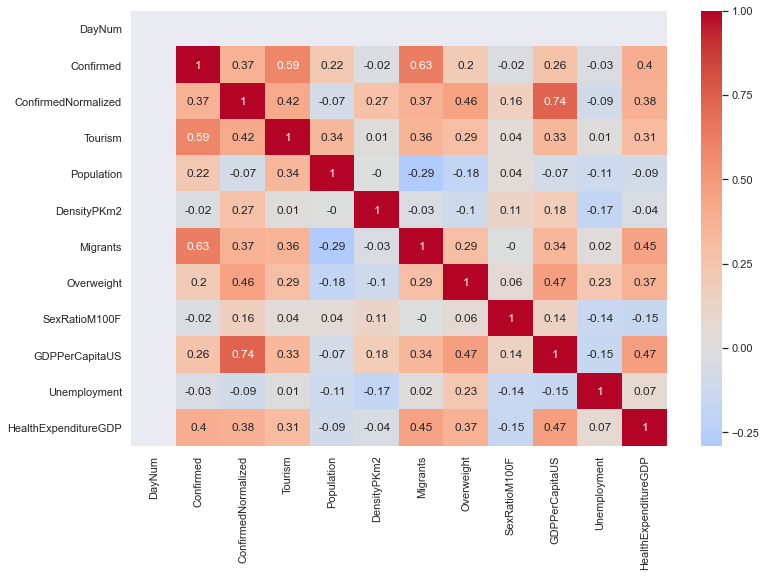

In [1078]:
plt.figure(figsize=(12,8))
sns.heatmap(cleancovid[cleancovid.DayNum == 115].corr().round(2), annot=True, cmap='coolwarm', center=0)

In [1079]:
nolockdown = cleancovid[cleancovid.Country.isin(['Sweden','Korea, South','Japan','Indonesia','Taiwan','Belarus','Nicaragua'])]
yeslockdown = cleancovid[~cleancovid.Country.isin(['Sweden','Korea, South','Japan','Indonesia','Taiwan','Belarus','Nicaragua'])]

In [1080]:
nolockdown.Population.mean()

71528267.71428572

In [1081]:
yeslockdown.Population.mean()

52989912.62790698

In [1083]:
nolockdown.ConfirmedNormalized = (nolockdown.Confirmed / nolockdown.Population * nolockdown.Population.mean()).round(4)
yeslockdown.ConfirmedNormalized = (yeslockdown.Confirmed / yeslockdown.Population * yeslockdown.Population.mean()).round(4)

In [1084]:
nolockdown.Country.unique().shape[0]

7

In [1085]:
yeslockdown.Country.unique().shape[0]

129

In [1086]:
nolockdown.Country.unique()

array(['Belarus', 'Indonesia', 'Japan', 'Korea, South', 'Nicaragua',
       'Sweden', 'Taiwan'], dtype=object)

In [1087]:
yeslockdown.Country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh',
       'Belgium', 'Benin', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia',
       'Cyprus', 'Czechia', 'Denmark', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Estonia', 'Ethiopia', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Guatemala', 'Guinea', 'Haiti', 'Honduras', 'Hungary', 'Iceland',
       'India', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica',
       'Jordan', 'Kazakhstan', 'Kenya', 'Kuwait', 'Kyrgyzstan', 'Laos',
       'Latvia', 'Lebanon', 'Liberia', 'Libya', 'Lithuania', 'Luxembourg',
       'Madagascar', 'Malawi', 'Malaysia', 'Maldives', 'Mali', 'Malta',
       'Maur

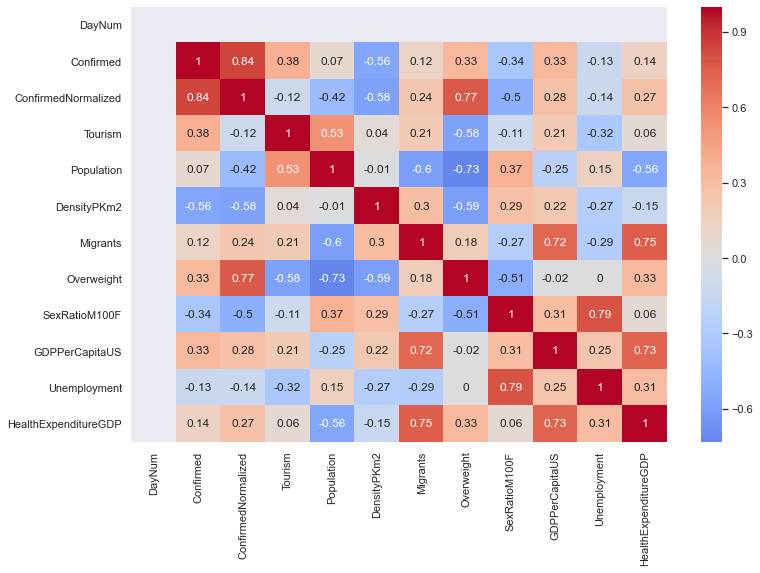

In [1088]:
plt.figure(figsize=(12,8))
sns.heatmap(nolockdown[nolockdown.DayNum == 115].corr().round(2), annot=True, cmap='coolwarm', center=0)

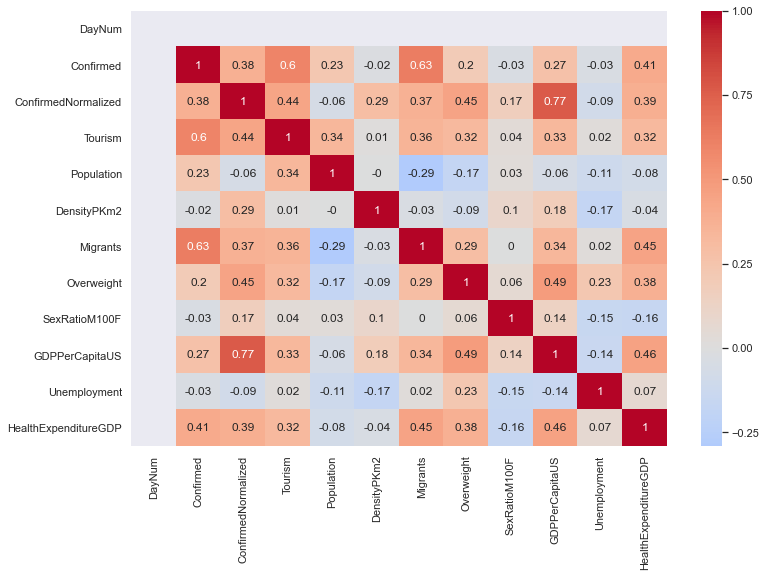

In [1089]:
plt.figure(figsize=(12,8))
sns.heatmap(yeslockdown[yeslockdown.DayNum == 115].corr().round(2), annot=True, cmap='coolwarm', center=0)

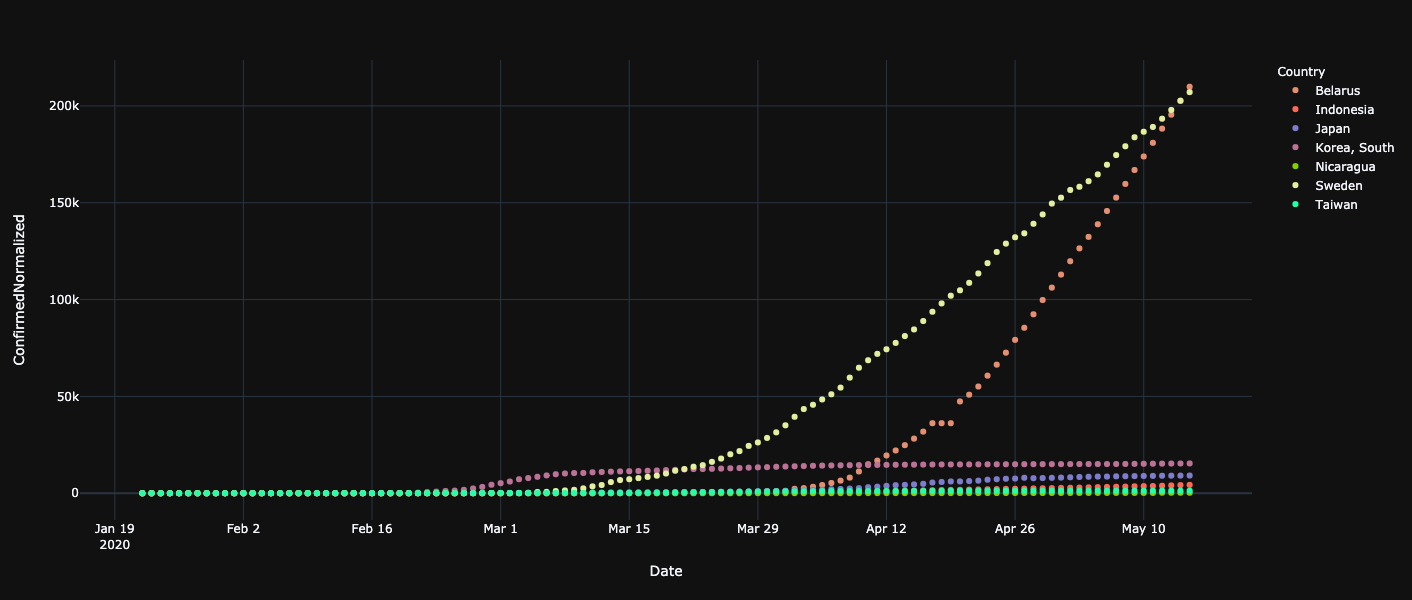

In [1090]:
px.scatter(nolockdown, x='Date', y='ConfirmedNormalized', color='Country', color_discrete_sequence=px.colors.qualitative.Light24_r, template='plotly_dark', width=1000, height=600)

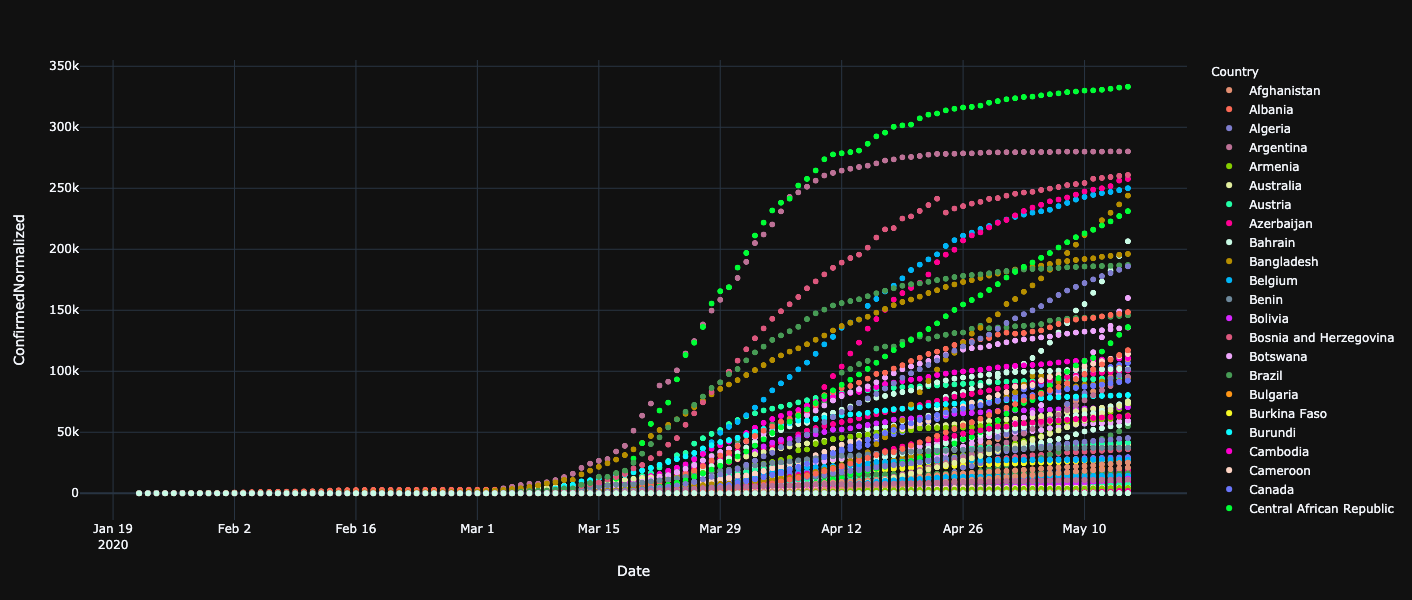

In [1091]:
px.scatter(yeslockdown, x='Date', y='ConfirmedNormalized', color='Country', color_discrete_sequence=px.colors.qualitative.Light24_r, template='plotly_dark', width=1000, height=600)

In [1134]:
yeslockdown

DayNum       Date      Country  Confirmed  ConfirmedNormalized  \
0           1 2020-01-22  Afghanistan          0               0.0000   
1           1 2020-01-22      Albania          0               0.0000   
2           1 2020-01-22      Algeria          0               0.0000   
3           1 2020-01-22    Argentina          0               0.0000   
4           1 2020-01-22      Armenia          0               0.0000   
...       ...        ...          ...        ...                  ...   
15635     115 2020-05-15   Uzbekistan       2686            4265.3812   
15636     115 2020-05-15    Venezuela        459             854.8614   
15637     115 2020-05-15      Vietnam        314             171.2517   
15638     115 2020-05-15       Zambia        654            1896.4967   
15639     115 2020-05-15     Zimbabwe         42             150.1925   

        Tourism  Population  DensityPKm2  Migrants  Overweight  SexRatioM100F  \
0         14000    38742911           60  -62920.0        19.7          106.3   
1       5340000     2878420          105  -14000.0        58.7          101.9   
2       2657000    43685618           18  -10000.0        60.7          102.0   
3       6942000    45111229           17    4800.0        63.4           95.9   
4       1652000     2962137          104   -4998.0        55.7           88.8   
...         ...         ...          ...       ...         ...            ...   
15635   5346000    33368859           79   -8863.0        45.7           99.4   
15636     14000    28451828           32 -653249.0        62.6           99.0   
15637  15498000    97160127          314  -80000.0        18.3           98.0   
15638   1072000    18273379           25   -8000.0        23.9           98.5   
15639   2580000    14818157           38 -116858.0        32.4           95.0   

       GDPPerCapitaUS  Unemployment  HealthExpenditureGDP  
0               623.2           8.6                   8.2  
1              3984.2          15.8                   5.9  
2              4154.1          11.4                   7.2  
3             14564.5           6.5                   4.8  
4              3489.1          16.6                   4.5  
...               ...           ...                   ...  
15635          2308.3           8.9                   5.8  
15636         11068.9           6.6                   5.3  
15637          2067.9           2.2                   7.1  
15638          1311.1           7.4                   5.0  
15639           890.4           5.0                   6.0  

[14835 rows x 14 columns]

In [1135]:
covidfinal = yeslockdown.copy()
covidfinal = covidfinal.drop(columns=['Date','Country','Confirmed','Population'])
covidfinal

DayNum  ConfirmedNormalized   Tourism  DensityPKm2  Migrants  \
0           1               0.0000     14000           60  -62920.0   
1           1               0.0000   5340000          105  -14000.0   
2           1               0.0000   2657000           18  -10000.0   
3           1               0.0000   6942000           17    4800.0   
4           1               0.0000   1652000          104   -4998.0   
...       ...                  ...       ...          ...       ...   
15635     115            4265.3812   5346000           79   -8863.0   
15636     115             854.8614     14000           32 -653249.0   
15637     115             171.2517  15498000          314  -80000.0   
15638     115            1896.4967   1072000           25   -8000.0   
15639     115             150.1925   2580000           38 -116858.0   

       Overweight  SexRatioM100F  GDPPerCapitaUS  Unemployment  \
0            19.7          106.3           623.2           8.6   
1            58.7          101.9          3984.2          15.8   
2            60.7          102.0          4154.1          11.4   
3            63.4           95.9         14564.5           6.5   
4            55.7           88.8          3489.1          16.6   
...           ...            ...             ...           ...   
15635        45.7           99.4          2308.3           8.9   
15636        62.6           99.0         11068.9           6.6   
15637        18.3           98.0          2067.9           2.2   
15638        23.9           98.5          1311.1           7.4   
15639        32.4           95.0           890.4           5.0   

       HealthExpenditureGDP  
0                       8.2  
1                       5.9  
2                       7.2  
3                       4.8  
4                       4.5  
...                     ...  
15635                   5.8  
15636                   5.3  
15637                   7.1  
15638                   5.0  
15639                   6.0  

[14835 rows x 10 columns]

# Model with LinearRegression

In [767]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [1136]:
X = covidfinal.drop(columns='ConfirmedNormalized')
y = covidfinal.ConfirmedNormalized
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [1137]:
# Scale all values before fitting into the model
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

X_train_scaled.head()

DayNum   Tourism  DensityPKm2  Migrants  Overweight  SexRatioM100F  \
0 -0.783251 -0.560345    -0.148696 -0.055904    0.309133      -0.489016   
1  0.394385 -0.569137    -0.193599 -0.181554   -1.336853      -0.230775   
2 -0.783251 -0.547398     0.038400 -0.051941   -0.029083      -0.201429   
3 -0.481293 -0.560345    -0.148696 -0.055904    0.309133      -0.489016   
4  1.209671 -0.569137     0.352720 -0.107297   -1.500324      -0.254251   

   GDPPerCapitaUS  Unemployment  HealthExpenditureGDP  
0       -0.662027     -0.543382              1.333177  
1       -0.699119      0.251117             -0.900282  
2        0.276763     -0.691196             -0.421684  
3       -0.662027     -0.543382              1.333177  
4       -0.710069     -1.023778              0.216447

In [1138]:
y_test_log

5623     0.000000
776      0.000000
9566     8.880148
3609     0.000000
12260    5.963016
           ...   
15368    8.950745
3124     0.000000
7777     6.495097
8750     8.418811
3556     1.429952
Name: ConfirmedNormalized, Length: 2967, dtype: float64

In [1139]:
# Fit
lm = LinearRegression()
lm.fit(X_train_scaled, y_train_log)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [1140]:
lm.intercept_

4.641723293957595

In [1141]:
pd.DataFrame(lm.coef_, X_train_scaled.columns, columns=['Coef'])

Coef
DayNum                3.492576
Tourism               0.410343
DensityPKm2           0.298201
Migrants             -0.142734
Overweight            0.755105
SexRatioM100F         0.053007
GDPPerCapitaUS        0.647419
Unemployment         -0.059753
HealthExpenditureGDP  0.033100

In [1142]:
# Predict
pred = lm.predict(X_test_scaled)

Text(0, 0.5, 'pred')

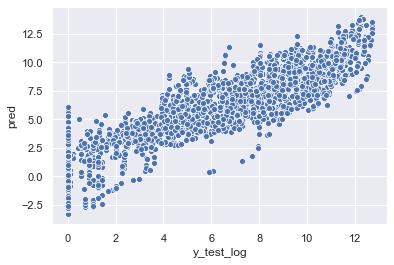

In [1143]:
sns.scatterplot(x=y_test_log, y=pred)
plt.xlabel('y_test_log')
plt.ylabel('pred')

In [1144]:
# R2 value (ESS/TSS, percentage of the error that can be explained by the model)
lm.score(X_test_scaled, y_test_log)

0.8182747318586225

In [1145]:
# Root mean squared error
print('RMSE ', np.sqrt(metrics.mean_squared_error(y_test_log, pred)))

RMSE  1.7780266596581902


Text(0.5, 0, 'Residuals')

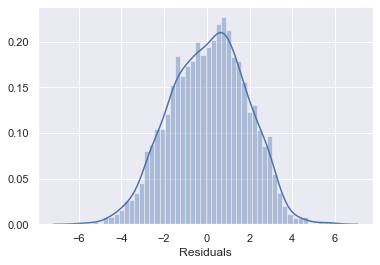

In [1146]:
# Residuals distribution plot
sns.distplot(y_test_log-pred, bins=50)
plt.xlabel('Residuals')

In [ ]:
'The residuals are normally distributed, satisfying one of the assumptions of linear regression.'

# Evaluate with statmodels summary

In [736]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [1147]:
train = X_train_scaled.copy()
train['ConfirmedLog'] = y_train_log.to_list()
train

DayNum   Tourism  DensityPKm2  Migrants  Overweight  SexRatioM100F  \
0     -0.783251 -0.560345    -0.148696 -0.055904    0.309133      -0.489016   
1      0.394385 -0.569137    -0.193599 -0.181554   -1.336853      -0.230775   
2     -0.783251 -0.547398     0.038400 -0.051941   -0.029083      -0.201429   
3     -0.481293 -0.560345    -0.148696 -0.055904    0.309133      -0.489016   
4      1.209671 -0.569137     0.352720 -0.107297   -1.500324      -0.254251   
...         ...       ...          ...       ...         ...            ...   
11863 -1.507950 -0.409977    -0.279662 -0.114047    0.681171       0.086157   
11864 -0.511489 -0.174399    -0.021471 -0.249060    0.636075      -0.078178   
11865  1.119084 -0.462729    -0.093814 -0.108748    0.156936      -0.213168   
11866 -1.689125 -0.569137    -0.159921 -0.036516    0.624801      -0.348157   
11867  1.390846 -0.057634    -0.002761  0.220244    1.323782       2.017094   

       GDPPerCapitaUS  Unemployment  HealthExpenditureGDP  ConfirmedLog  
0           -0.662027     -0.543382              1.333177      0.000000  
1           -0.699119      0.251117             -0.900282      6.406392  
2            0.276763     -0.691196             -0.421684      0.000000  
3           -0.662027     -0.543382              1.333177      0.000000  
4           -0.710069     -1.023778              0.216447      6.771857  
...               ...           ...                   ...           ...  
11863       -0.524326      0.639129              0.096798      0.000000  
11864       -0.405067      1.193431             -1.019932      1.774071  
11865       -0.537792     -1.023778             -0.302034      7.248115  
11866        0.116618      0.361978              0.455747      0.000000  
11867        0.827039     -1.060731             -1.578297     11.092738  

[11868 rows x 10 columns]

In [1148]:
train.columns

Index(['DayNum', 'Tourism', 'DensityPKm2', 'Migrants', 'Overweight',
       'SexRatioM100F', 'GDPPerCapitaUS', 'Unemployment',
       'HealthExpenditureGDP', 'ConfirmedLog'],
      dtype='object')

In [1149]:
m = ols('ConfirmedLog ~ DayNum + Tourism + DensityPKm2 + Migrants + Overweight + SexRatioM100F + GDPPerCapitaUS + Unemployment + HealthExpenditureGDP', train).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:           ConfirmedLog   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     5754.
Date:                Fri, 10 Jul 2020   Prob (F-statistic):               0.00
Time:                        17:12:50   Log-Likelihood:                -23857.
No. Observations:               11868   AIC:                         4.773e+04
Df Residuals:                   11858   BIC:                         4.781e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                4.6417 

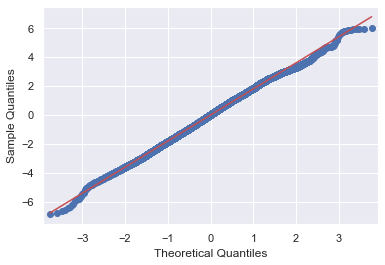

In [1151]:
# Quantile of residuals plot
sm.qqplot(m.resid, line='r')
plt.show()

In [ ]:
'The plot follows the normal distribution line.'

# Predict current US & Italy confirmed cases July 9

In [1178]:
realtest = yeslockdown[(yeslockdown.Country == 'US') | (yeslockdown.Country == 'Italy') & (yeslockdown.DayNum == 1)][:2]
realtest

DayNum       Date Country  Confirmed  ConfirmedNormalized   Tourism  \
59        1 2020-01-22   Italy          0                  0.0  61567200   
125       1 2020-01-22      US          0                  0.0  79745920   

     Population  DensityPKm2  Migrants  Overweight  SexRatioM100F  \
59     60479424          206  148943.0        64.1           95.1   
125   330610570           36  954806.0        70.2           98.0   

     GDPPerCapitaUS  Unemployment  HealthExpenditureGDP  
59          30462.4          11.4                   9.2  
125         56053.8           4.9                  17.1

In [1179]:
realtest.Date = '2020-07-09'
realtest.Date = realtest.Date.astype('datetime64')
realtest.DayNum = realtest.Date.dt.dayofyear - 21
realtest = realtest.drop(columns=['Date','Country','Confirmed','ConfirmedNormalized','Population'])
realtest

DayNum   Tourism  DensityPKm2  Migrants  Overweight  SexRatioM100F  \
59      170  61567200          206  148943.0        64.1           95.1   
125     170  79745920           36  954806.0        70.2           98.0   

     GDPPerCapitaUS  Unemployment  HealthExpenditureGDP  
59          30462.4          11.4                   9.2  
125         56053.8           4.9                  17.1

In [1154]:
realtest = pd.DataFrame(scaler.transform(realtest), columns=realtest.columns)
realtest

DayNum   Tourism  DensityPKm2  Migrants  Overweight  SexRatioM100F  \
0  3.383768  3.137556    -0.045170  0.958919    0.872827      -0.318812   
1  3.383768  4.232267    -0.257211  6.399008    1.216680      -0.148607   

   GDPPerCapitaUS  Unemployment  HealthExpenditureGDP  
0        0.889288      0.639129              0.894462  
1        2.264382     -0.561859              4.045234

In [1155]:
realpredict = lm.predict(realtest)

In [1156]:
realpredict

array([18.80626085, 19.75073536])

In [1158]:
np.expm1(realpredict)

array([1.47046709e+08, 3.78124987e+08])

In [1163]:
1.47046709e+08

147046709.0

In [1161]:
3.78124987e+08

378124987.0

In [1157]:
yeslockdown.Population.mean()

52989912.62790698

In [1164]:
# Italy predict
147046709 / 52989912.62790698 * 60479424

167830060.86203635

In [1162]:
# US predict
378124987 / 52989912.62790698 * 330610570

2359168213.0359907

In [ ]:
# Italy current
242363

In [ ]:
# US current
3118075

In [ ]:
'Way off.'

# Model with XGBRegressor

In [850]:
from xgboost import XGBRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [1169]:
xgb = XGBRegressor(n_jobs=8, random_state=1)

In [1170]:
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1,
             objective='reg:squarederror', random_state=1, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [1171]:
xgbpred = xgb.predict(X_test)

In [1172]:
xgb.score(X_train, y_train)

0.999640838547515

In [1173]:
xgb.score(X_test, y_test)

0.9983830276748513

In [1174]:
# Feature Importance
pd.DataFrame(xgb.feature_importances_, X_test.columns, columns=['FeatureImportance']).sort_values('FeatureImportance', ascending=False)

FeatureImportance
GDPPerCapitaUS                 0.379191
Tourism                        0.151073
DayNum                         0.122642
Unemployment                   0.095768
DensityPKm2                    0.078117
Overweight                     0.050328
HealthExpenditureGDP           0.046770
SexRatioM100F                  0.045200
Migrants                       0.030912

In [1175]:
pd.Series(xgbpred).sort_values()

2411     -1277.936401
2680     -1197.458862
2624     -1155.144653
1143     -1107.626709
354      -1068.236572
            ...      
1799    317854.750000
2325    319235.218750
1745    325930.187500
548     328387.531250
1638    330410.343750
Length: 2967, dtype: float32

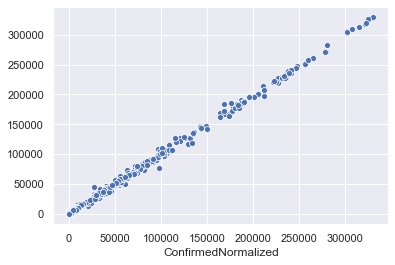

In [1176]:
sns.scatterplot(y_test, xgbpred)

In [1180]:
xgb.predict(realtest)

array([196504.92, 231331.61], dtype=float32)

In [1181]:
yeslockdown.Population.mean()

52989912.62790698

In [1182]:
# Italy predict
196504.92 / 52989912.62790698 * 60479424 

224278.61804978977

In [1183]:
# US predict
231331.61 / 52989912.62790698 * 330610570

1443306.3133763196

In [ ]:
# Italy current
242363

In [ ]:
# US current
3118075

# Predict current date July 9

In [1187]:
july9 = pd.read_csv('july9confirmed.csv', header=None)
july9.columns = ['Confirmed','Country']
july9.Country = july9.Country.str.rstrip()
july9 = july9.sort_values('Country').reset_index().drop(columns='index')
july9.head()

Confirmed      Country
0      33908  Afghanistan
1       3188      Albania
2      17808      Algeria
3        855      Andorra
4        396       Angola

In [1188]:
set(yeslockdown.Country.unique()) - set(july9.Country.unique())

set()

In [1189]:
july9list = list(set(july9.Country.unique()) - set(yeslockdown.Country.unique()))
july9 = july9[~july9.Country.isin(july9list)]
set(july9.Country.unique()) - set(yeslockdown.Country.unique())

set()

In [1198]:
yeslockdown

DayNum       Date      Country  Confirmed  ConfirmedNormalized  \
0           1 2020-01-22  Afghanistan          0               0.0000   
1           1 2020-01-22      Albania          0               0.0000   
2           1 2020-01-22      Algeria          0               0.0000   
3           1 2020-01-22    Argentina          0               0.0000   
4           1 2020-01-22      Armenia          0               0.0000   
...       ...        ...          ...        ...                  ...   
15635     115 2020-05-15   Uzbekistan       2686            4265.3812   
15636     115 2020-05-15    Venezuela        459             854.8614   
15637     115 2020-05-15      Vietnam        314             171.2517   
15638     115 2020-05-15       Zambia        654            1896.4967   
15639     115 2020-05-15     Zimbabwe         42             150.1925   

        Tourism  Population  DensityPKm2  Migrants  Overweight  SexRatioM100F  \
0         14000    38742911           60  -62920.0        19.7          106.3   
1       5340000     2878420          105  -14000.0        58.7          101.9   
2       2657000    43685618           18  -10000.0        60.7          102.0   
3       6942000    45111229           17    4800.0        63.4           95.9   
4       1652000     2962137          104   -4998.0        55.7           88.8   
...         ...         ...          ...       ...         ...            ...   
15635   5346000    33368859           79   -8863.0        45.7           99.4   
15636     14000    28451828           32 -653249.0        62.6           99.0   
15637  15498000    97160127          314  -80000.0        18.3           98.0   
15638   1072000    18273379           25   -8000.0        23.9           98.5   
15639   2580000    14818157           38 -116858.0        32.4           95.0   

       GDPPerCapitaUS  Unemployment  HealthExpenditureGDP  
0               623.2           8.6                   8.2  
1              3984.2          15.8                   5.9  
2              4154.1          11.4                   7.2  
3             14564.5           6.5                   4.8  
4              3489.1          16.6                   4.5  
...               ...           ...                   ...  
15635          2308.3           8.9                   5.8  
15636         11068.9           6.6                   5.3  
15637          2067.9           2.2                   7.1  
15638          1311.1           7.4                   5.0  
15639           890.4           5.0                   6.0  

[14835 rows x 14 columns]

In [1192]:
yeslockdown.groupby('Country').Population.median().reset_index().head()

Country  Population
0  Afghanistan    38742911
1      Albania     2878420
2      Algeria    43685618
3    Argentina    45111229
4      Armenia     2962137

In [1195]:
july9 = july9.merge(yeslockdown.groupby('Country').Population.median().reset_index(), on='Country', how='left')
july9.insert(1, 'ConfirmedNormalized', (july9.Confirmed / july9.Population * july9.Population.mean()).round(4))
july9.head()

Confirmed  ConfirmedNormalized      Country  Population
0      33908           46377.0509  Afghanistan    38742911
1       3188           58689.0869      Albania     2878420
2      17808           21600.8015      Algeria    43685618
3      90693          106532.5475    Argentina    45111229
4      30346          542862.0920      Armenia     2962137

In [1197]:
covidfinal[covidfinal.DayNum == 115].head()

DayNum  ConfirmedNormalized  Tourism  DensityPKm2  Migrants  \
15504     115            8278.8808    14000           60  -62920.0   
15505     115           16862.9873  5340000          105  -14000.0   
15506     115            8040.8644  2657000           18  -10000.0   
15507     115            8785.2086  6942000           17    4800.0   
15508     115           72343.4489  1652000          104   -4998.0   

       Overweight  SexRatioM100F  GDPPerCapitaUS  Unemployment  \
15504        19.7          106.3           623.2           8.6   
15505        58.7          101.9          3984.2          15.8   
15506        60.7          102.0          4154.1          11.4   
15507        63.4           95.9         14564.5           6.5   
15508        55.7           88.8          3489.1          16.6   

       HealthExpenditureGDP  
15504                   8.2  
15505                   5.9  
15506                   7.2  
15507                   4.8  
15508                   4.5

In [1204]:
july9_x = covidfinal[covidfinal.DayNum == 115]
july9_x.DayNum = 170
july9_x = july9_x.drop(columns='ConfirmedNormalized')
july9_y = july9.ConfirmedNormalized

In [1206]:
july9_x.head()

DayNum  Tourism  DensityPKm2  Migrants  Overweight  SexRatioM100F  \
15504     170    14000           60  -62920.0        19.7          106.3   
15505     170  5340000          105  -14000.0        58.7          101.9   
15506     170  2657000           18  -10000.0        60.7          102.0   
15507     170  6942000           17    4800.0        63.4           95.9   
15508     170  1652000          104   -4998.0        55.7           88.8   

       GDPPerCapitaUS  Unemployment  HealthExpenditureGDP  
15504           623.2           8.6                   8.2  
15505          3984.2          15.8                   5.9  
15506          4154.1          11.4                   7.2  
15507         14564.5           6.5                   4.8  
15508          3489.1          16.6                   4.5

In [1208]:
xgb.score(july9_x, july9_y)

0.25389829912910966

# Retrain XGBRegressor with new data up to June 29

In [1214]:
newcleandf = pd.read_csv('covid_19_clean_complete2/covid_19_clean_complete2.csv')
newcleandf

Province/State         Country/Region        Lat       Long        Date  \
0                NaN            Afghanistan  33.000000  65.000000  2020-01-22   
1                NaN                Albania  41.153300  20.168300  2020-01-22   
2                NaN                Algeria  28.033900   1.659600  2020-01-22   
3                NaN                Andorra  42.506300   1.521800  2020-01-22   
4                NaN                 Angola -11.202700  17.873900  2020-01-22   
...              ...                    ...        ...        ...         ...   
44365            NaN  Sao Tome and Principe   0.186360   6.613081  2020-07-09   
44366            NaN                  Yemen  15.552727  48.516388  2020-07-09   
44367            NaN                Comoros -11.645500  43.333300  2020-07-09   
44368            NaN             Tajikistan  38.861034  71.276093  2020-07-09   
44369            NaN                Lesotho -29.609988  28.233608  2020-07-09   

       Confirmed  Deaths  Recovered  Active             WHO Region  
0              0       0          0       0  Eastern Mediterranean  
1              0       0          0       0                 Europe  
2              0       0          0       0                 Africa  
3              0       0          0       0                 Europe  
4              0       0          0       0                 Africa  
...          ...     ...        ...     ...                    ...  
44365        726      14        283     429                 Africa  
44366       1356     361          0     995  Eastern Mediterranean  
44367        314       7        272      35                 Africa  
44368       6410      54          0    6356                 Europe  
44369        134       1         20     113                 Africa  

[44370 rows x 10 columns]

In [1233]:
newcleandf = newcleandf.rename(columns={'Province/State':'State', 'Country/Region':'Country'})
newcleandf.Date = newcleandf.Date.astype('datetime64')
newcleandf = newcleandf.groupby(['Date', 'Country']).sum().reset_index()
newcleandf.insert(0, 'DayNum', newcleandf.Date.dt.dayofyear - 21)
newcleandf = newcleandf[['DayNum','Date','Country','Confirmed']]
newcleandf.Country = newcleandf.Country.map(lambda c: rename_country(c))
newcleandflist = set(newcleandf.Country.unique()) - set(yeslockdown.Country.unique())
newcleandf = newcleandf[~newcleandf.Country.isin(newcleandflist)]
newcleandf = newcleandf[(newcleandf.DayNum >= 116) & (newcleandf.DayNum <= 160)]
newcleandf

DayNum       Date      Country  Confirmed
21505     116 2020-05-16  Afghanistan       6402
21506     116 2020-05-16      Albania        933
21507     116 2020-05-16      Algeria       6821
21511     116 2020-05-16    Argentina       7805
21512     116 2020-05-16      Armenia       4283
...       ...        ...          ...        ...
29912     160 2020-06-29   Uzbekistan       8222
29913     160 2020-06-29    Venezuela       5530
29914     160 2020-06-29      Vietnam        355
29918     160 2020-06-29       Zambia       1568
29919     160 2020-06-29     Zimbabwe        574

[5805 rows x 4 columns]

In [1244]:
cleandfmerged = newcleandf.merge(yeslockdown[yeslockdown.DayNum == 115].drop(columns=['DayNum','Date','Confirmed','ConfirmedNormalized']), on='Country', how='left')
cleandfmerged.insert(4, 'ConfirmedNormalized', (cleandfmerged.Confirmed / cleandfmerged.Population * cleandfmerged.Population.mean()).round(4))
cleandfmerged

DayNum       Date      Country  Confirmed  ConfirmedNormalized  \
0        116 2020-05-16  Afghanistan       6402            8756.2192   
1        116 2020-05-16      Albania        933           17175.9467   
2        116 2020-05-16      Algeria       6821            8273.7571   
3        116 2020-05-16    Argentina       7805            9168.1445   
4        116 2020-05-16      Armenia       4283           76618.9396   
...      ...        ...          ...        ...                  ...   
5800     160 2020-06-29   Uzbekistan       8222           13056.5765   
5801     160 2020-06-29    Venezuela       5530           10299.3107   
5802     160 2020-06-29      Vietnam        355             193.6125   
5803     160 2020-06-29       Zambia       1568            4546.9523   
5804     160 2020-06-29     Zimbabwe        574            2052.6311   

       Tourism  Population  DensityPKm2  Migrants  Overweight  SexRatioM100F  \
0        14000    38742911           60  -62920.0        19.7          106.3   
1      5340000     2878420          105  -14000.0        58.7          101.9   
2      2657000    43685618           18  -10000.0        60.7          102.0   
3      6942000    45111229           17    4800.0        63.4           95.9   
4      1652000     2962137          104   -4998.0        55.7           88.8   
...        ...         ...          ...       ...         ...            ...   
5800   5346000    33368859           79   -8863.0        45.7           99.4   
5801     14000    28451828           32 -653249.0        62.6           99.0   
5802  15498000    97160127          314  -80000.0        18.3           98.0   
5803   1072000    18273379           25   -8000.0        23.9           98.5   
5804   2580000    14818157           38 -116858.0        32.4           95.0   

      GDPPerCapitaUS  Unemployment  HealthExpenditureGDP  
0              623.2           8.6                   8.2  
1             3984.2          15.8                   5.9  
2             4154.1          11.4                   7.2  
3            14564.5           6.5                   4.8  
4             3489.1          16.6                   4.5  
...              ...           ...                   ...  
5800          2308.3           8.9                   5.8  
5801         11068.9           6.6                   5.3  
5802          2067.9           2.2                   7.1  
5803          1311.1           7.4                   5.0  
5804           890.4           5.0                   6.0  

[5805 rows x 14 columns]

In [1248]:
cleandfcat = pd.concat([yeslockdown, cleandfmerged])
cleandfcat = cleandfcat.reset_index().drop(columns='index')
cleandfcat

DayNum       Date      Country  Confirmed  ConfirmedNormalized  \
0           1 2020-01-22  Afghanistan          0               0.0000   
1           1 2020-01-22      Albania          0               0.0000   
2           1 2020-01-22      Algeria          0               0.0000   
3           1 2020-01-22    Argentina          0               0.0000   
4           1 2020-01-22      Armenia          0               0.0000   
...       ...        ...          ...        ...                  ...   
20635     160 2020-06-29   Uzbekistan       8222           13056.5765   
20636     160 2020-06-29    Venezuela       5530           10299.3107   
20637     160 2020-06-29      Vietnam        355             193.6125   
20638     160 2020-06-29       Zambia       1568            4546.9523   
20639     160 2020-06-29     Zimbabwe        574            2052.6311   

        Tourism  Population  DensityPKm2  Migrants  Overweight  SexRatioM100F  \
0         14000    38742911           60  -62920.0        19.7          106.3   
1       5340000     2878420          105  -14000.0        58.7          101.9   
2       2657000    43685618           18  -10000.0        60.7          102.0   
3       6942000    45111229           17    4800.0        63.4           95.9   
4       1652000     2962137          104   -4998.0        55.7           88.8   
...         ...         ...          ...       ...         ...            ...   
20635   5346000    33368859           79   -8863.0        45.7           99.4   
20636     14000    28451828           32 -653249.0        62.6           99.0   
20637  15498000    97160127          314  -80000.0        18.3           98.0   
20638   1072000    18273379           25   -8000.0        23.9           98.5   
20639   2580000    14818157           38 -116858.0        32.4           95.0   

       GDPPerCapitaUS  Unemployment  HealthExpenditureGDP  
0               623.2           8.6                   8.2  
1              3984.2          15.8                   5.9  
2              4154.1          11.4                   7.2  
3             14564.5           6.5                   4.8  
4              3489.1          16.6                   4.5  
...               ...           ...                   ...  
20635          2308.3           8.9                   5.8  
20636         11068.9           6.6                   5.3  
20637          2067.9           2.2                   7.1  
20638          1311.1           7.4                   5.0  
20639           890.4           5.0                   6.0  

[20640 rows x 14 columns]

In [1249]:
cleandffinal = cleandfcat.drop(columns=['Date','Country','Confirmed','Population'])
cleandffinal

DayNum  ConfirmedNormalized   Tourism  DensityPKm2  Migrants  \
0           1               0.0000     14000           60  -62920.0   
1           1               0.0000   5340000          105  -14000.0   
2           1               0.0000   2657000           18  -10000.0   
3           1               0.0000   6942000           17    4800.0   
4           1               0.0000   1652000          104   -4998.0   
...       ...                  ...       ...          ...       ...   
20635     160           13056.5765   5346000           79   -8863.0   
20636     160           10299.3107     14000           32 -653249.0   
20637     160             193.6125  15498000          314  -80000.0   
20638     160            4546.9523   1072000           25   -8000.0   
20639     160            2052.6311   2580000           38 -116858.0   

       Overweight  SexRatioM100F  GDPPerCapitaUS  Unemployment  \
0            19.7          106.3           623.2           8.6   
1            58.7          101.9          3984.2          15.8   
2            60.7          102.0          4154.1          11.4   
3            63.4           95.9         14564.5           6.5   
4            55.7           88.8          3489.1          16.6   
...           ...            ...             ...           ...   
20635        45.7           99.4          2308.3           8.9   
20636        62.6           99.0         11068.9           6.6   
20637        18.3           98.0          2067.9           2.2   
20638        23.9           98.5          1311.1           7.4   
20639        32.4           95.0           890.4           5.0   

       HealthExpenditureGDP  
0                       8.2  
1                       5.9  
2                       7.2  
3                       4.8  
4                       4.5  
...                     ...  
20635                   5.8  
20636                   5.3  
20637                   7.1  
20638                   5.0  
20639                   6.0  

[20640 rows x 10 columns]

In [1250]:
X = cleandffinal.drop(columns='ConfirmedNormalized')
y = cleandffinal.ConfirmedNormalized
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [1251]:
xgb = XGBRegressor(n_jobs=8, random_state=1)

In [1252]:
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1,
             objective='reg:squarederror', random_state=1, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [1253]:
xgbpred = xgb.predict(X_test)

In [1254]:
xgb.score(X_train, y_train)

0.9993722000356018

In [1255]:
xgb.score(X_test, y_test)

0.9980903304371269

In [1256]:
# Feature Importance
pd.DataFrame(xgb.feature_importances_, X_test.columns, columns=['FeatureImportance']).sort_values('FeatureImportance', ascending=False)

FeatureImportance
GDPPerCapitaUS                 0.340450
HealthExpenditureGDP           0.156424
Migrants                       0.127999
DensityPKm2                    0.084536
Unemployment                   0.083656
DayNum                         0.077273
Tourism                        0.049847
SexRatioM100F                  0.040470
Overweight                     0.039346

In [1257]:
pd.Series(xgbpred).sort_values()

1005     -3052.145020
358      -2532.965576
3802     -2530.678711
851      -2362.961670
3797     -2250.047607
            ...      
2875    619510.187500
1085    624416.250000
3328    653866.437500
3408    677469.500000
4111    759803.562500
Length: 4128, dtype: float32

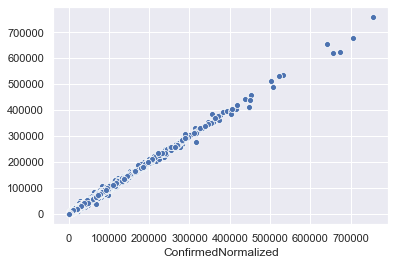

In [1258]:
sns.scatterplot(y_test, xgbpred)

# Predict current confirmed cases (July 9) with new XGBRegressor model

In [1259]:
realtest

DayNum   Tourism  DensityPKm2  Migrants  Overweight  SexRatioM100F  \
59      170  61567200          206  148943.0        64.1           95.1   
125     170  79745920           36  954806.0        70.2           98.0   

     GDPPerCapitaUS  Unemployment  HealthExpenditureGDP  
59          30462.4          11.4                   9.2  
125         56053.8           4.9                  17.1

In [1260]:
xgb.predict(realtest)

array([211379.25, 405160.84], dtype=float32)

In [1181]:
yeslockdown.Population.mean()

52989912.62790698

In [1261]:
# Italy predict
196504.92 / 52989912.62790698 * 60479424 

224278.61804978977

In [1262]:
# US predict
231331.61 / 52989912.62790698 * 330610570

1443306.3133763196

In [ ]:
# Italy current
242363

In [ ]:
# US current
3118075

In [ ]:
'Very close for Italy, US is a little off.'

In [1283]:
july9_x.head()

DayNum  Tourism  DensityPKm2  Migrants  Overweight  SexRatioM100F  \
15504     170    14000           60  -62920.0        19.7          106.3   
15505     170  5340000          105  -14000.0        58.7          101.9   
15506     170  2657000           18  -10000.0        60.7          102.0   
15507     170  6942000           17    4800.0        63.4           95.9   
15508     170  1652000          104   -4998.0        55.7           88.8   

       GDPPerCapitaUS  Unemployment  HealthExpenditureGDP  
15504           623.2           8.6                   8.2  
15505          3984.2          15.8                   5.9  
15506          4154.1          11.4                   7.2  
15507         14564.5           6.5                   4.8  
15508          3489.1          16.6                   4.5

In [1287]:
july9_y.head()

0     46377.0509
1     58689.0869
2     21600.8015
3    106532.5475
4    542862.0920
Name: ConfirmedNormalized, dtype: float64

In [1288]:
xgb.score(july9_x, july9_y)

0.9586709012065053

# Saving model as pickle file

In [1289]:
import joblib

In [1290]:
joblib.dump(xgb, 'covidxgbmodel.pkl')

['covidxgbmodel.pkl']

In [1296]:
joblib.dump(cleandfcat, 'covidtraindf.pkl')

['covidtraindf.pkl']

In [1318]:
joblib.dump(cleandfcat[cleandfcat.DayNum == 160], 'covidcountrydf.pkl')

['covidcountrydf.pkl']

In [1320]:
july9_x[:1]

DayNum  Tourism  DensityPKm2  Migrants  Overweight  SexRatioM100F  \
15504     170    14000           60  -62920.0        19.7          106.3   

       GDPPerCapitaUS  Unemployment  HealthExpenditureGDP  
15504           623.2           8.6                   8.2

In [1323]:
int(xgb.predict(july9_x[:1])[0])

42525

In [1295]:
cleandfcat

DayNum       Date      Country  Confirmed  ConfirmedNormalized  \
0           1 2020-01-22  Afghanistan          0               0.0000   
1           1 2020-01-22      Albania          0               0.0000   
2           1 2020-01-22      Algeria          0               0.0000   
3           1 2020-01-22    Argentina          0               0.0000   
4           1 2020-01-22      Armenia          0               0.0000   
...       ...        ...          ...        ...                  ...   
20635     160 2020-06-29   Uzbekistan       8222           13056.5765   
20636     160 2020-06-29    Venezuela       5530           10299.3107   
20637     160 2020-06-29      Vietnam        355             193.6125   
20638     160 2020-06-29       Zambia       1568            4546.9523   
20639     160 2020-06-29     Zimbabwe        574            2052.6311   

        Tourism  Population  DensityPKm2  Migrants  Overweight  SexRatioM100F  \
0         14000    38742911           60  -62920.0        19.7          106.3   
1       5340000     2878420          105  -14000.0        58.7          101.9   
2       2657000    43685618           18  -10000.0        60.7          102.0   
3       6942000    45111229           17    4800.0        63.4           95.9   
4       1652000     2962137          104   -4998.0        55.7           88.8   
...         ...         ...          ...       ...         ...            ...   
20635   5346000    33368859           79   -8863.0        45.7           99.4   
20636     14000    28451828           32 -653249.0        62.6           99.0   
20637  15498000    97160127          314  -80000.0        18.3           98.0   
20638   1072000    18273379           25   -8000.0        23.9           98.5   
20639   2580000    14818157           38 -116858.0        32.4           95.0   

       GDPPerCapitaUS  Unemployment  HealthExpenditureGDP  
0               623.2           8.6                   8.2  
1              3984.2          15.8                   5.9  
2              4154.1          11.4                   7.2  
3             14564.5           6.5                   4.8  
4              3489.1          16.6                   4.5  
...               ...           ...                   ...  
20635          2308.3           8.9                   5.8  
20636         11068.9           6.6                   5.3  
20637          2067.9           2.2                   7.1  
20638          1311.1           7.4                   5.0  
20639           890.4           5.0                   6.0  

[20640 rows x 14 columns]

In [1292]:
xgb

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1,
             objective='reg:squarederror', random_state=1, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)